<a href="https://colab.research.google.com/github/UmaRamanathan-DA/Jamboree-Ivy-League-Admissions-Prediction/blob/main/Jamboree_Admissions_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jamboree Education - Linear Regression

**Business Case**

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

**Context**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


**How can you help here?**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Dataset:**
[Jamboree_Admission.csv](Jamboree_Admission.csv)

**Dataset Columns:**
- Serial No.: Unique row identifier (to be dropped as it's irrelevant for analysis).
- GRE Score: Scores obtained in GRE, ranging from 0 to 340.
- TOEFL Score: Scores obtained in TOEFL, ranging from 0 to 120.
- University Rating: University rating on a scale of 1 to 5.
- SOP: Strength of the Statement of Purpose on a scale of 1 to 5.
- LOR: Strength of the Letter of Recommendation on a scale of 1 to 5.
- CGPA: Undergraduate GPA on a scale of 0 to 10.
- Research: Research experience (1 for having experience, 0 otherwise).
- Chance of Admit: The probability of admission, ranging from 0 to 1.

**Concept Used:**

1. Exploratory Data Analysis
2. Linear Regression

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [ ]:
# Load the dataset
file_path = 'Jamboree_Admission.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The dataset has been successfully loaded. Here's an overview of the columns and their respective data:

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Shape of data

In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (500, 9)


# Columns and Data types

In [ ]:
print("\nColumn Names and Data Types:\n", data.dtypes)


Column Names and Data Types:
 Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


# Descriptive Statistics

In [ ]:
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
        Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000

In [ ]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Assessing shape of the distribution

In [ ]:
# Skewness and Kurtosis
print("\nSkewness of Variables:")
print(data.skew())

print("\nKurtosis of Variables:")
print(data.kurtosis())


Skewness of Variables:
Serial No.           0.000000
GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

Kurtosis of Variables:
Serial No.          -1.200000
GRE Score           -0.711064
TOEFL Score         -0.653245
University Rating   -0.810080
SOP                 -0.705717
LOR                 -0.745749
CGPA                -0.561278
Research            -1.949018
Chance of Admit     -0.454682
dtype: float64


# Removing any trailing spaces from column names

In [ ]:
data.columns = data.columns.str.strip()

<span style="color:blue"> Dataset column names have been cleaned </span>

# Removing Serial Number columns

In [ ]:
# Drop the "Serial No." column as it is irrelevant for analysis
data = data.drop(columns=['Serial No.'], axis=1)

# Verify that the column has been dropped
print("Columns after dropping 'Serial No.':\n", data.columns)

Columns after dropping 'Serial No.':
 Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')


<span style="color:blue"> Column 'Serial No.' has been removed for Regression Model </span>

# Checking for missing values

In [ ]:
print("\nMissing Values in Each Column:\n", data.isnull().sum())


Missing Values in Each Column:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


<span style="color:blue"> There are no missing values in the dataset </span>

# Checking for duplicate rows

In [ ]:
print("\nNumber of Duplicate Rows:", data.duplicated().sum())


Number of Duplicate Rows: 0


<span style="color:blue"> There are no duplicate rows in the dataset </span>

# Identifying categorical variables

In [ ]:
# Display unique values for each column (if needed for categorical data)
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

print("Column Names:", data.columns.tolist())

Column 'GRE Score' has 49 unique values.
Column 'TOEFL Score' has 29 unique values.
Column 'University Rating' has 5 unique values.
Column 'SOP' has 9 unique values.
Column 'LOR' has 9 unique values.
Column 'CGPA' has 184 unique values.
Column 'Research' has 2 unique values.
Column 'Chance of Admit' has 61 unique values.
Column Names: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']


In [ ]:
# Count unique values for each categorical variable
for col in data.columns:
    if data[col].dtype == 'object' or len(data[col].unique()) <= 10:  # Identify categorical variables
        print(f"Value counts for {col}:")
        print(data[col].value_counts())
        print("\n")

Value counts for University Rating:
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64


Value counts for SOP:
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64


Value counts for LOR:
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64


Value counts for Research:
1    280
0    220
Name: Research, dtype: int64




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


<span style="color:blue">

Below are identified as categorical variables. No need to encode them as they are already in numeric formats
- University Rating (ordinal) (1 to 5)
- Research columns (binary 0 or 1)

</span>

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Identifying Target (Dependent) Variable

- Chance of Admit

# Identifying Features (Predictors) (Independent) Variables

- 'GRE Score',
- 'TOEFL Score',
- 'University Rating',
- 'SOP',
- 'LOR',
- 'CGPA',
- 'Research'

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Univariate Analysis

Using histograms and KDE plots to visualize the distribution of each variable.

## GRE Score Distribution

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64


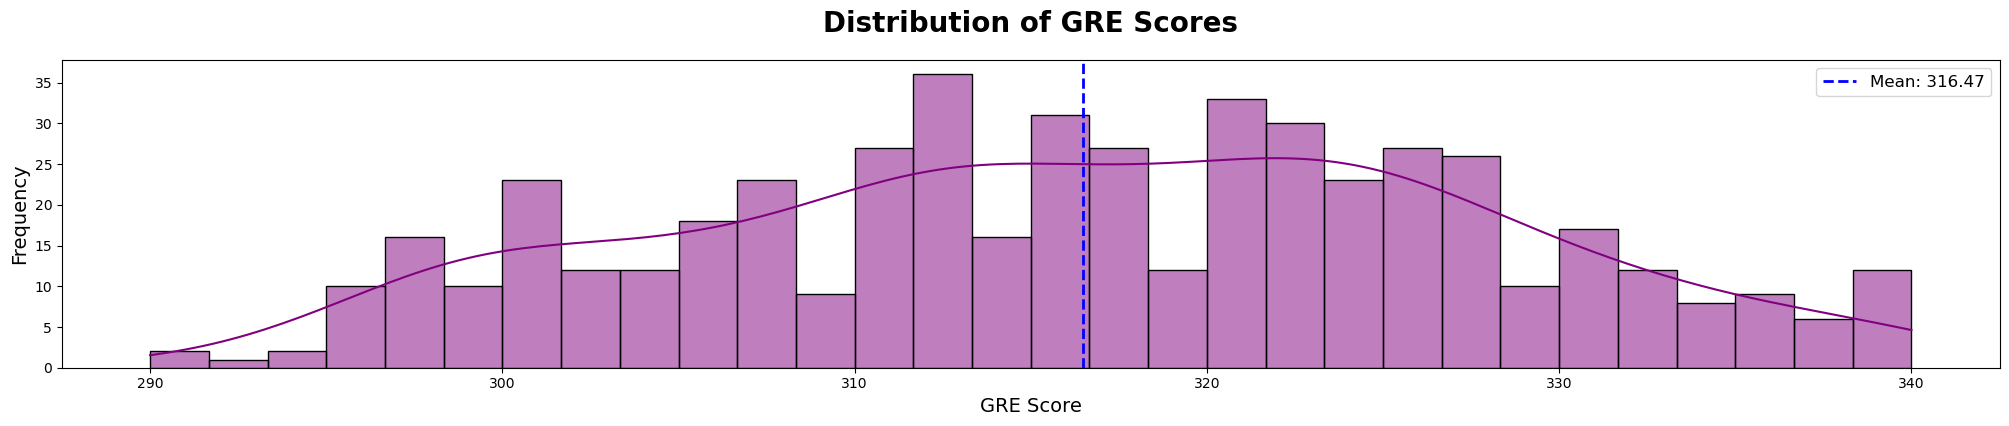

In [ ]:
column_name = 'GRE Score'

print(data[column_name].describe())

plt.figure(figsize=(25, 4))
sns.histplot(data[column_name], kde=True, bins=30, color='purple')

# Highlight the mean
mean_value = data[column_name].mean()
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.title(f'Distribution of {column_name}s', fontsize=20, pad=20, fontweight='bold')
plt.xlabel(column_name, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()

<span style="color:blue">
    
The histogram shows the frequency distribution of GRE Score across different ranges. The blue dashed line represents the mean value of the GRE Score, which is approximately 316.47. This value is slightly skewed towards the higher GRE scores.

Most students have GRE scores in the range of 310 to 320, as evidenced by the higher frequency of bars in this range.
Students scoring below 300 or above 330 form the tails of the distribution, indicating fewer candidates in these extremes. The mean GRE score of 316.47 suggests that Jamboree students are performing at a competitive level for graduate admissions. Students scoring near the lower end (290–300) might need additional preparation to improve their competitiveness for Ivy League or other top universities.

Students scoring close to the mean (310–320) may focus on improving other aspects of their application (TOEFL, CGPA, SOP, LOR) to strengthen their overall profile.
For students targeting scores above 330, tailored preparation strategies focusing on advanced problem-solving and test-taking techniques may help.

Ivy League schools typically expect GRE scores in the upper percentiles. A score of 316.47 is a solid foundation, but for highly competitive programs, students may need to aim for scores closer to 330 or above.

The GRE score can serve as a key predictor in the admission probability model.
The mean score of 316.47 provides a baseline for evaluating the competitiveness of a student's application. Scores below this mean may indicate areas for targeted intervention, while scores above this mean can highlight strong candidates.
</span>

## TOEFL Score Distribution

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64


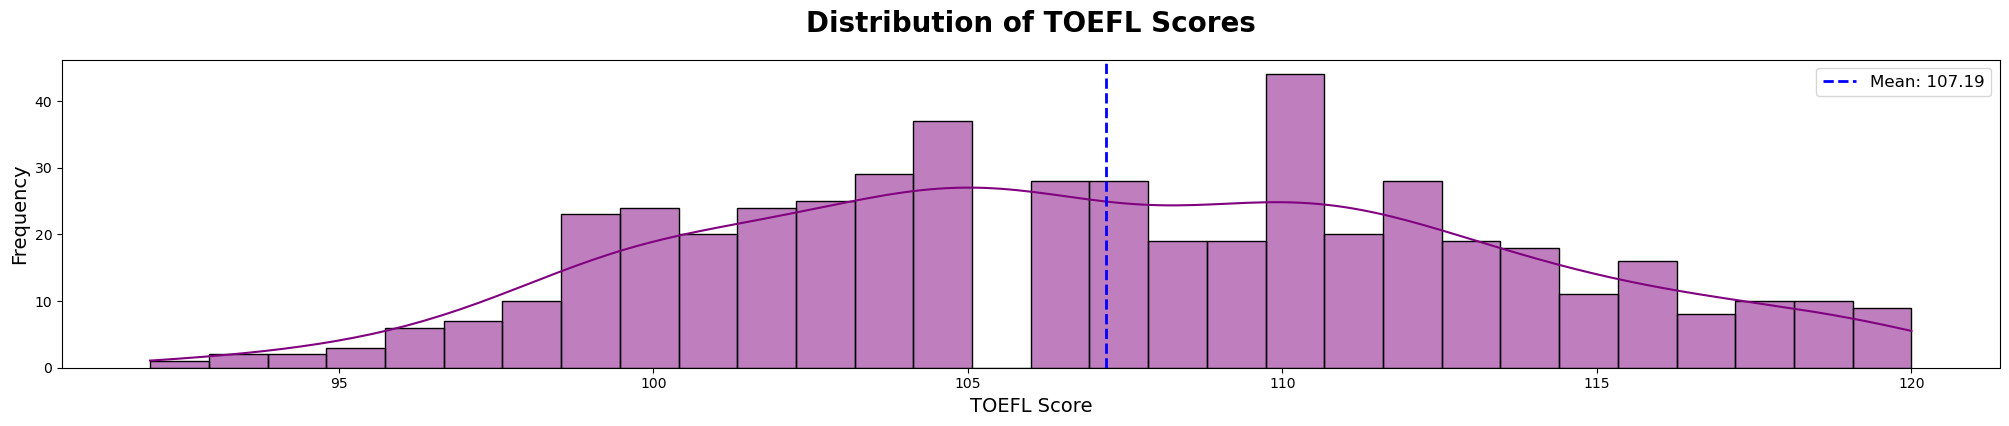

In [ ]:
column_name = 'TOEFL Score'

print(data[column_name].describe())

plt.figure(figsize=(25, 4))
sns.histplot(data[column_name], kde=True, bins=30, color='purple')

# Highlight the mean
mean_value = data[column_name].mean()
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.title(f'Distribution of {column_name}s', fontsize=20, pad=20, fontweight='bold')
plt.xlabel(column_name, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()


<span style="color:blue">

The histogram displays the frequency of TOEFL scores across various ranges

**Understanding Student TOEFL Performance:** The histogram shows that the majority of students have TOEFL scores in the range of 100–110, with an average score of 107.19. This suggests that Jamboree students are generally well-prepared, achieving scores above the minimum requirements of many universities abroad. Students scoring below 95 might need additional support or targeted preparation to improve their TOEFL performance and enhance their chances of admission to Ivy League or top-tier universities.

**Importance of TOEFL Scores in Graduate Admissions:** Since the dataset suggests that the typical TOEFL score for Jamboree students is around 107, this score can serve as a benchmark for evaluating student readiness.

**Actionable Insights for Jamboree:**

- **Personalized Feedback:** Use this distribution to provide personalized feedback to students on where they stand relative to their peers and what areas to improve.
- **Targeted Interventions:** Students in the lower tail of the distribution ($<$95) represent a group that may benefit from additional coaching or specific problem-solving strategies to improve their scores. Jamboree could develop specialized TOEFL preparation modules to focus on these students.
- **Ivy League Admissions:** Jamboree could emphasize the importance of achieving scores near or above the mean (107) to ensure students remain competitive in the application process.
- **Encouraging High Performers:** Students scoring above the mean (e.g., 110–120) could be encouraged to focus on other areas (GRE, SOP, LORs) to make their application even more competitive for Ivy League universities.
</span>

## CGPA Score Distribution

count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64


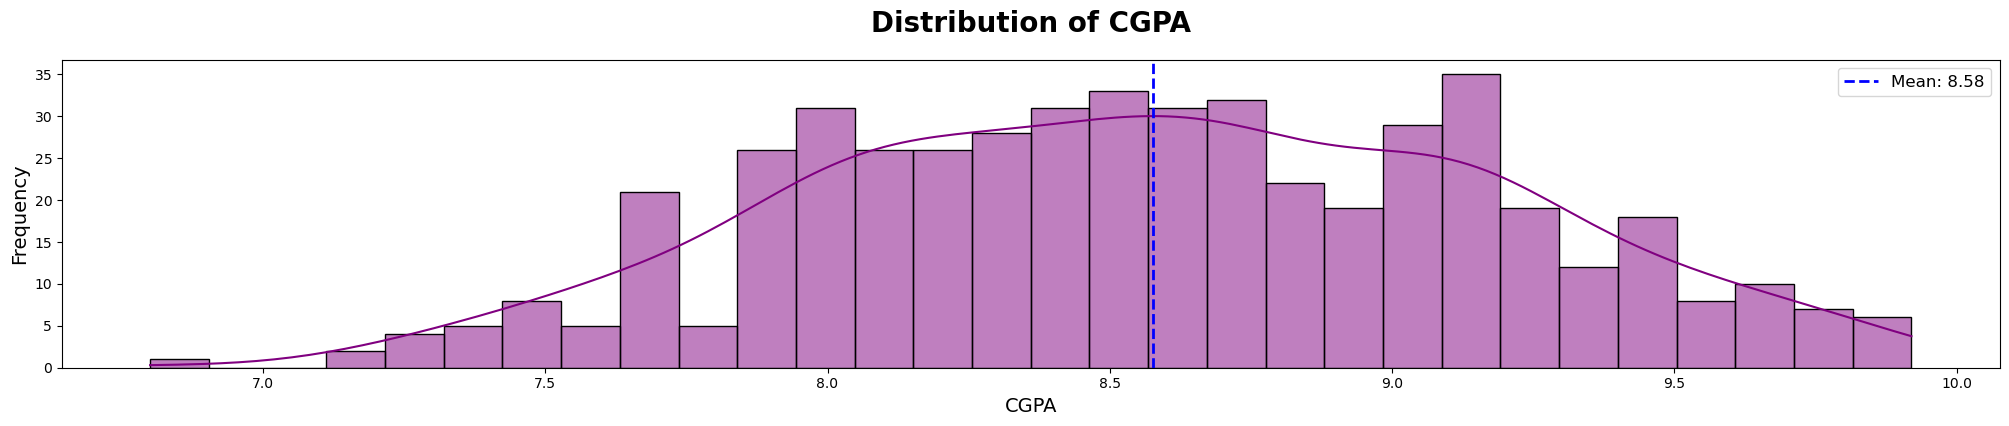

In [ ]:
column_name = 'CGPA'

print(data[column_name].describe())

plt.figure(figsize=(25, 4))
sns.histplot(data[column_name], kde=True, bins=30, color='purple')

# Highlight the mean
mean_value = data[column_name].mean()
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.title(f'Distribution of {column_name}', fontsize=20, pad=20, fontweight='bold')
plt.xlabel(column_name, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()

<span style="color:blue">

The histogram shows the distribution of CGPA scores ranging from 7.0 to 10.0. The mean CGPA score is 8.58, represented by the blue dashed line. The distribution is approximately symmetric, resembling a bell-shaped curve, suggesting that most students have CGPAs clustered around the mean.

**Performance Insights:** The majority of students have CGPAs in the range of 8.0 to 9.0, which is considered competitive for graduate admissions. Few students fall below 7.5, and even fewer exceed 9.5, indicating that the majority of Jamboree students maintain a strong academic record.

A CGPA of 8.58 is competitive for many top graduate programs abroad, including Ivy League universities.
Students scoring above the mean ($>$8.58) can focus on improving other aspects of their profile (GRE, TOEFL, SOP, LOR).
Students below the mean ($<$8.0) may need to compensate with outstanding GRE scores, strong SOPs, or exceptional extracurricular achievements to strengthen their applications.

**Opportunities for Improvement:** Students in the lower range ($<$7.5) may benefit from academic support and guidance on how to present their profiles effectively to admission committees. Emphasizing other aspects of the application (research experience, recommendation letters) can help offset a relatively lower CGPA.

The mean CGPA (8.58) provides a baseline for assessing student competitiveness
    
**Jamboree can highlight that a CGPA above 8.5 is highly competitive and aligns well with top universities’ expectations, motivating students to maintain or exceed this level.**

</span>


## SOP (Statement of Purpose) Distribution

count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64


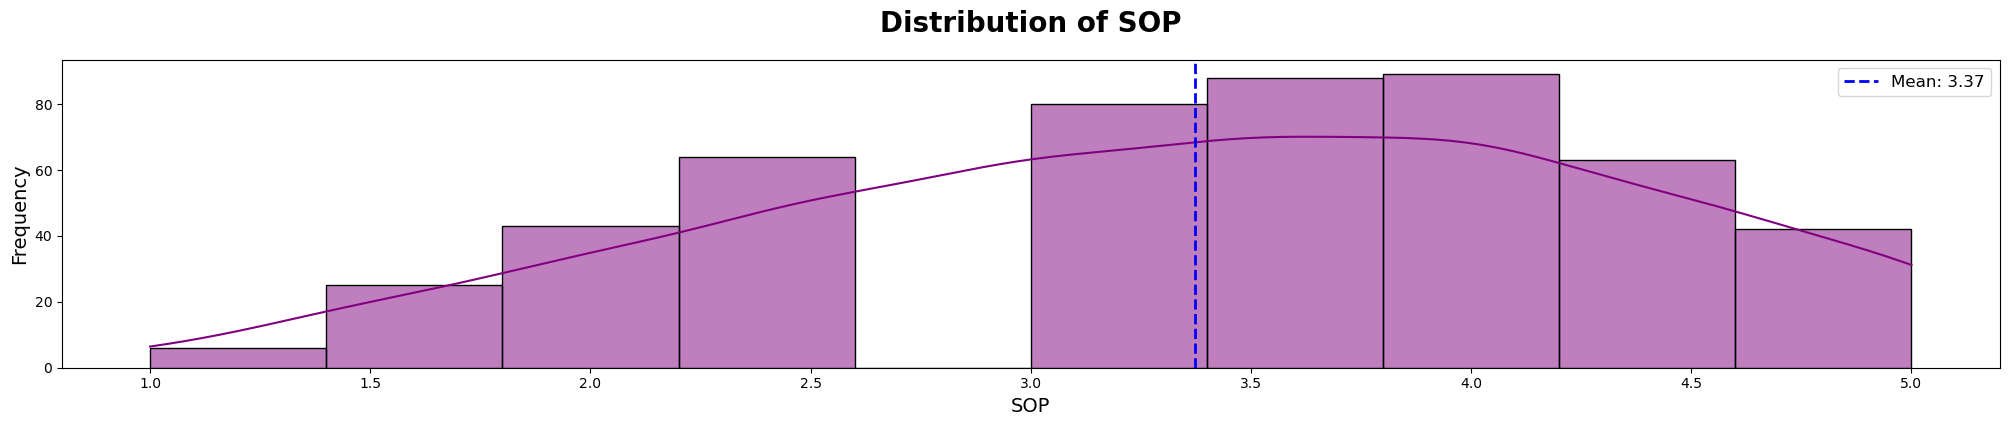

In [ ]:
column_name = 'SOP'

print(data[column_name].describe())

plt.figure(figsize=(25, 4))
sns.histplot(data[column_name], kde=True, bins=10, color='purple')

# Highlight the mean
mean_value = data[column_name].mean()
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.title(f'Distribution of {column_name}', fontsize=20, pad=20, fontweight='bold')
plt.xlabel(column_name, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()

<span style="color:blue">

The histogram represents the distribution of SOP scores, ranging from 1.0 to 5.0.
The mean SOP score is 3.37, as indicated by the blue dashed line could serve as the baseline for Jamboree admission criteria
The distribution is slightly right-skewed, with the majority of scores concentrated between 3.0 and 4.0.

- Most students have SOP scores in the range of 3.0 to 4.0, indicating that their statements of purpose are generally rated as "good" or "very good."
- Fewer students have exceptionally high scores (above 4.5), which suggests fewer exemplary SOPs.
- A small number of students fall below a score of 2.0, which may indicate weaker SOP quality. Students with SOP scores below 3.0 could benefit from workshops or one-on-one counseling to refine their writing skills and align their SOPs with admission expectations.
    
</span>


## LOR (Letter of Recommendation) Distribution

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64


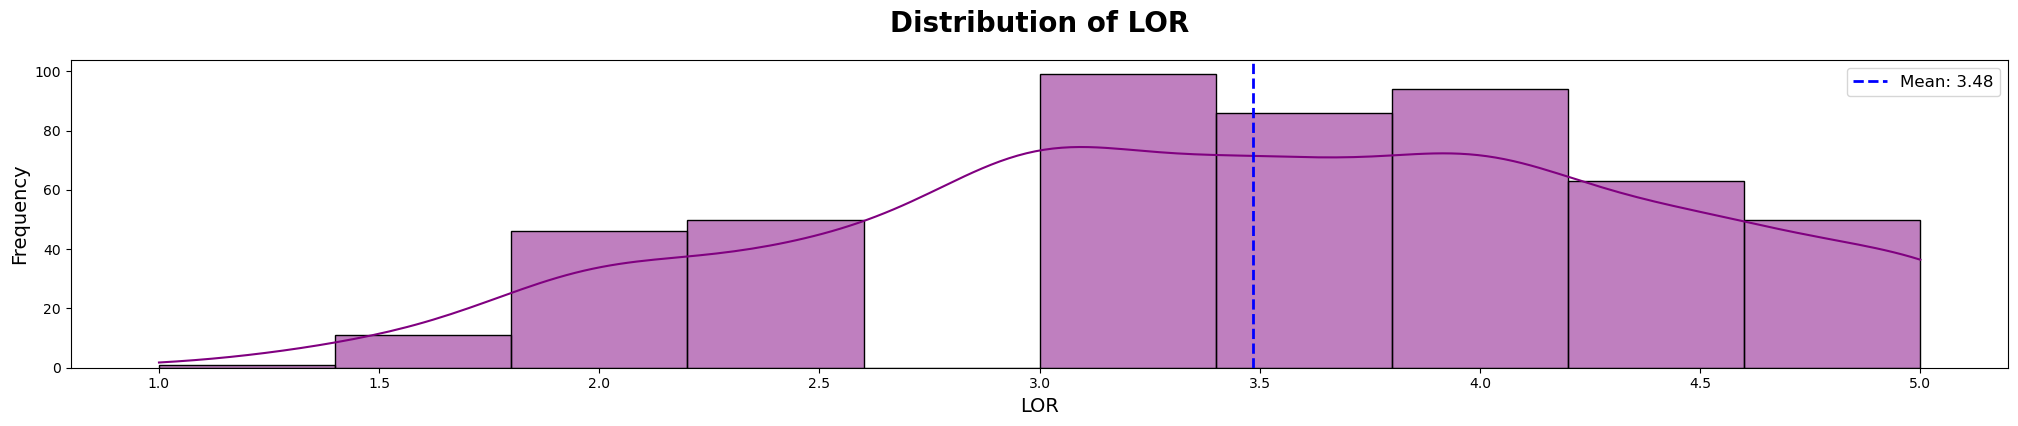

In [ ]:
column_name = 'LOR'

print(data[column_name].describe())

plt.figure(figsize=(25, 4))
sns.histplot(data[column_name], kde=True, bins=10, color='purple')

# Highlight the mean
mean_value = data[column_name].mean()
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.title(f'Distribution of {column_name}', fontsize=20, pad=20, fontweight='bold')
plt.xlabel(column_name, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()

<span style="color:blue">

The histogram shows the distribution of Letter of Recommendation (LOR) scores ranging from 1.0 to 5.0. The mean LOR score is 3.48, as indicated by the blue dashed line. The distribution is slightly right-skewed, with most scores concentrated in the range of 3.0 to 4.0.
    
**Typical Performance:** Most students have LOR scores around 3.0 to 4.0, suggesting that their recommendation letters are generally rated as "good" to "very good." A smaller proportion of students have extremely low scores (around 1.0), which could indicate weaker recommendation letters.
    
A mean score of 3.48 indicates that, on average, Jamboree students are securing recommendation letters with positive feedback, which is crucial for competitive graduate applications.Higher LOR scores (4.0 or above) can make an application stand out, as strong endorsements from professors or professionals are valued by Ivy League and other top universities, however its importance over other citeria to be analysed further.
    
**Recomendations for Jamboree:**

- Students with LOR scores below 3.0 may need guidance on selecting better referees or crafting stronger letters of recommendation. Workshops or counseling sessions could help students understand the importance of LORs and how to approach mentors or professors for impactful recommendations.
    
- The mean LOR score of 3.48 can serve as a baseline for evaluating a student’s competitiveness

</span>

## Chance of Admit Distribution

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64


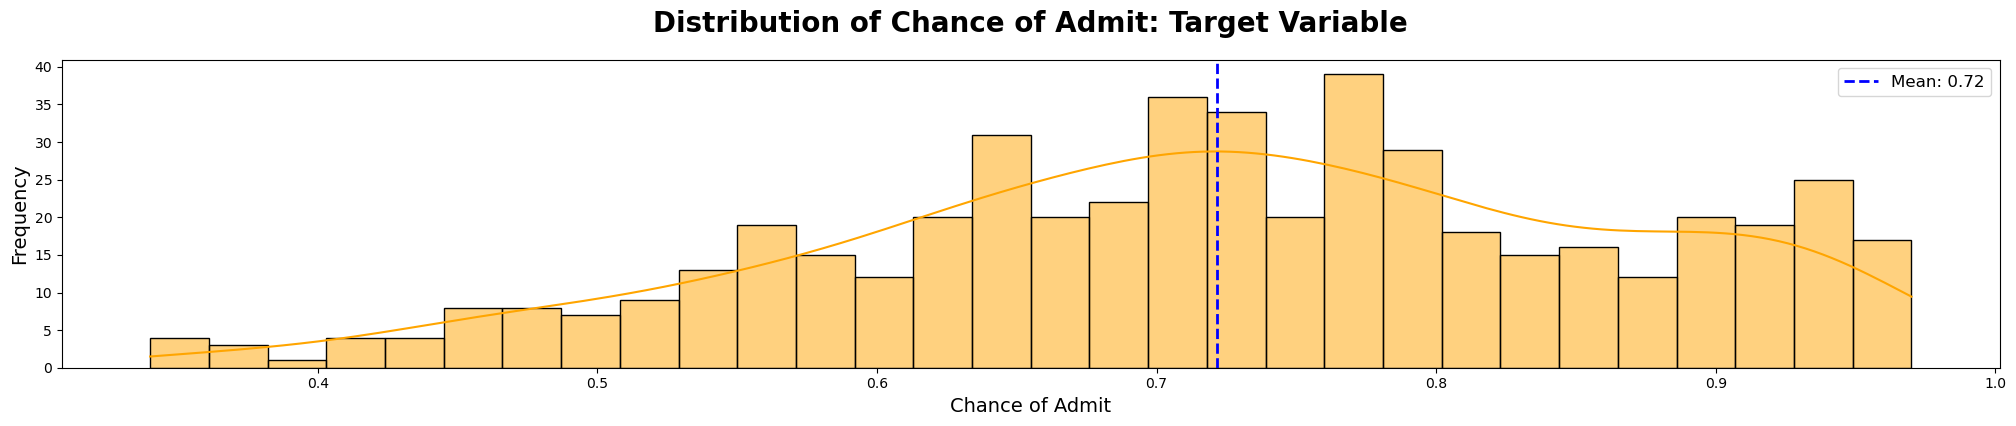

In [ ]:
column_name = 'Chance of Admit'

print(data[column_name].describe())

plt.figure(figsize=(25, 4))
sns.histplot(data[column_name], kde=True, bins=30, color='orange')

# Highlight the mean
mean_value = data[column_name].mean()
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.title(f'Distribution of {column_name}: Target Variable', fontsize=20, pad=20, fontweight='bold')
plt.xlabel(column_name, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()

<span style="color:blue">
    
**Distribution of Chance of Admit:**
This variable represents the probability of admission and appears to have a slightly right-skewed distribution, ranging from 0.4 to 1.0. A mean admission probability of 0.72 indicates that, on average, Jamboree students have a high chance of getting admitted to graduate programs. Most students have an admission probability in the range of 0.6 to 0.8, indicating a strong likelihood of securing admission. Students with lower admission probabilities ($<$0.5) may need to focus on improving specific areas of their application (GRE, TOEFL, SOP, LOR, etc.).

The mean value of 0.72 can serve as a benchmark to assess whether a student’s profile is competitive or requires additional preparation.
    
</span>

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Bivariate Analysis

Understanding the relationship between different factors responsible for admissions. Performing bivariate analysis to examine relationships between key variables and the "Chance of Admit. Using scatter plots and reg plots to explore relationships between predictors and the target variable.

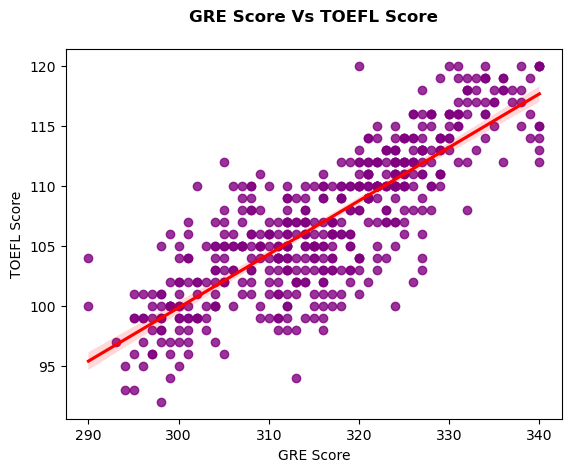

In [ ]:
fig = sns.regplot(x=data['GRE Score'], y=data['TOEFL Score'], ci=95, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title("GRE Score Vs TOEFL Score", fontsize=12, pad=20, fontweight='bold')
plt.show()

<span style="color:blue">

- The scatter plot indicates a positive correlation between GRE and TOEFL scores. As GRE scores increase, TOEFL scores tend to increase as well. Plot suggests that students who perform well on the GRE are also likely to perform well on the TOEFL. This relationship makes sense as both tests assess academic readiness, reasoning skills, and English proficiency, which are often interrelated. GRE scores range from approximately 290 to 340, while TOEFL scores range from 90 to 120.
Most data points cluster around GRE scores of 310–330 and TOEFL scores of 100–110, indicating that this is the typical performance range for students in the dataset.

- Students with high scores in both tests (upper right of the plot) are likely to have a stronger chance of admission to Ivy League or top-tier universities.</span>

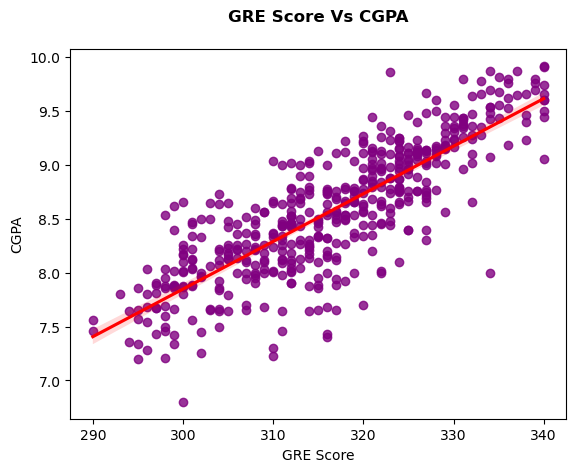

In [ ]:
fig = sns.regplot(x=data['GRE Score'], y=data['CGPA'], ci=95, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title("GRE Score Vs CGPA", fontsize=12, pad=20, fontweight='bold')
plt.show()

<span style="color:blue">
    
- The scatter plot shows a positive linear relationship between GRE scores and CGPA. Students with higher CGPA scores generally achieve higher GRE scores. This relationship reflects the academic consistency of high-performing students, as both CGPA and GRE measure aptitude and effort.

- GRE scores range from 290 to 340, and CGPA ranges from 7.0 to 10.0. A dense cluster of points is observed where GRE scores are between 310 and 330 and CGPA is between 8.0 and 9.0, highlighting the typical range for most students.

**Outliers:** There are a few data points where students with a relatively low CGPA have high GRE scores, and vice versa. These outliers could be due to varying test preparation levels or differences in academic grading standards across institutions.

**Insights:** A strong CGPA combined with a high GRE score (upper-right corner of the plot) strengthens a student’s application, making them competitive for Ivy League and top-tier universities.
    
</span>

## Bivariate analysis of variables with "Chance of admit" target variable

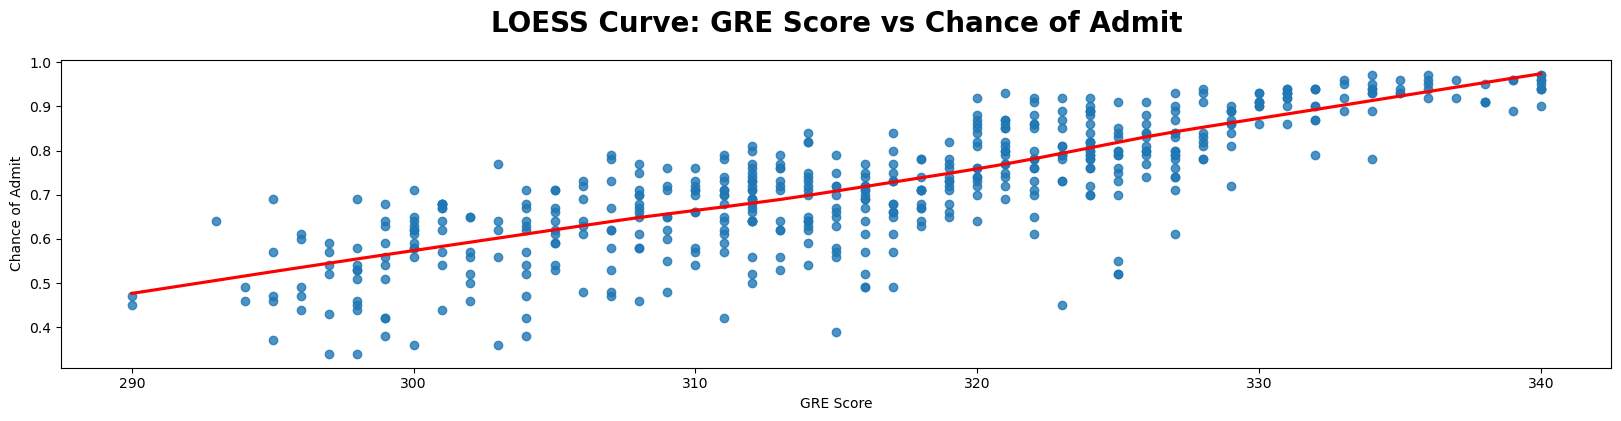

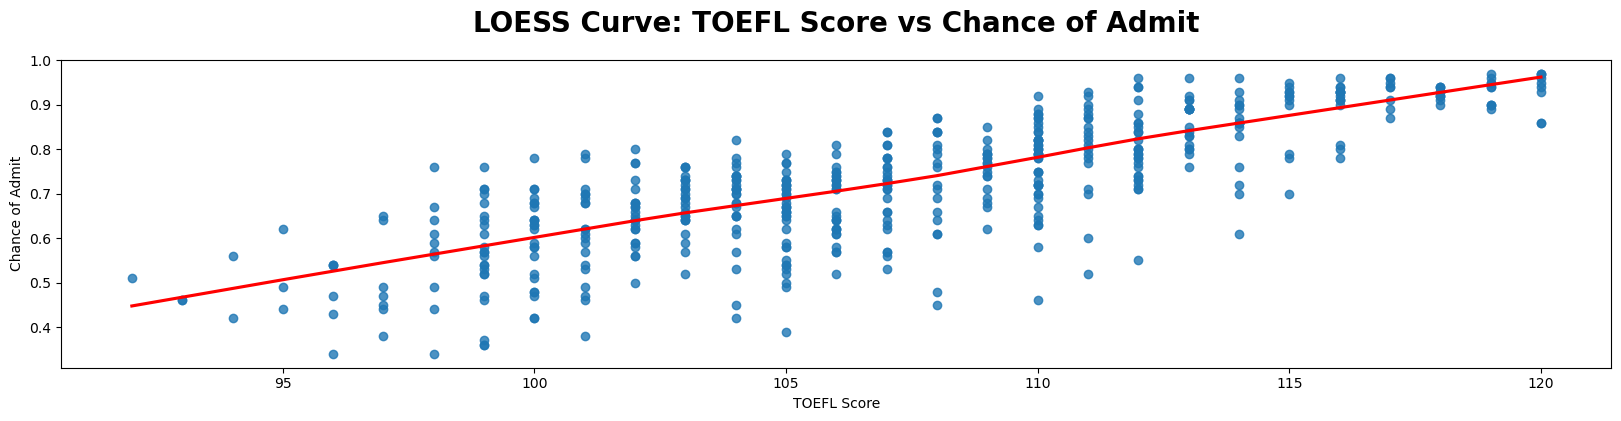

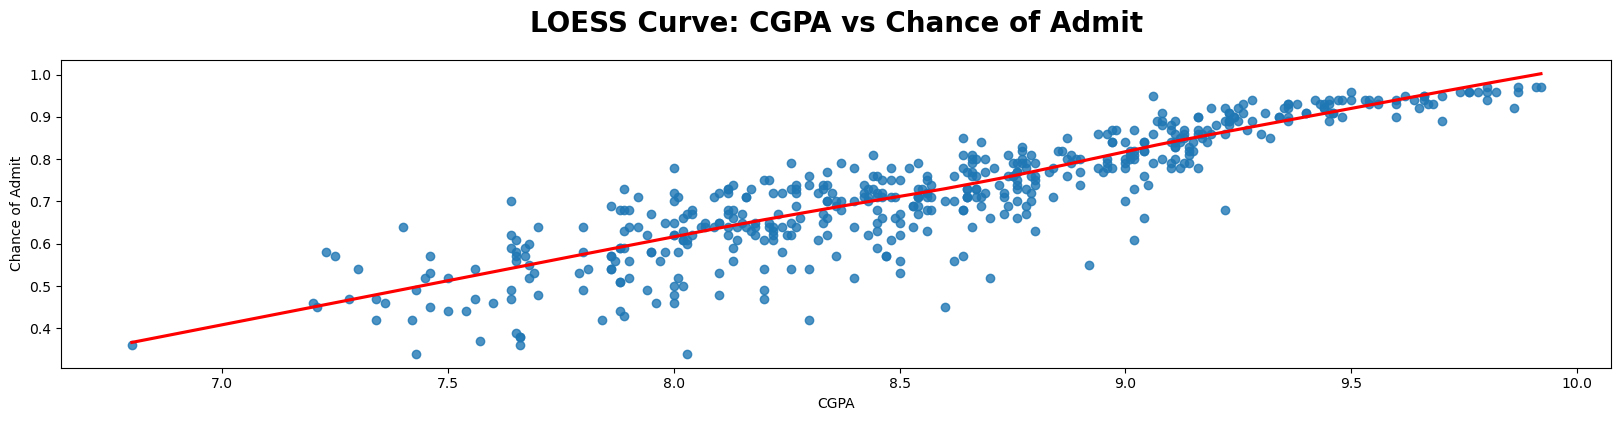

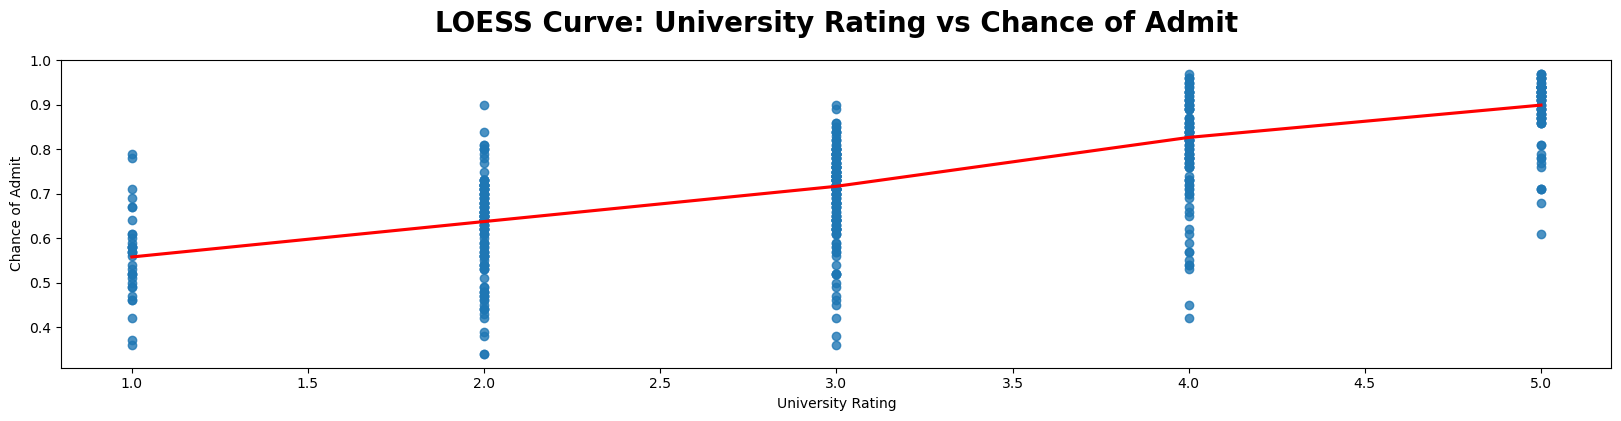

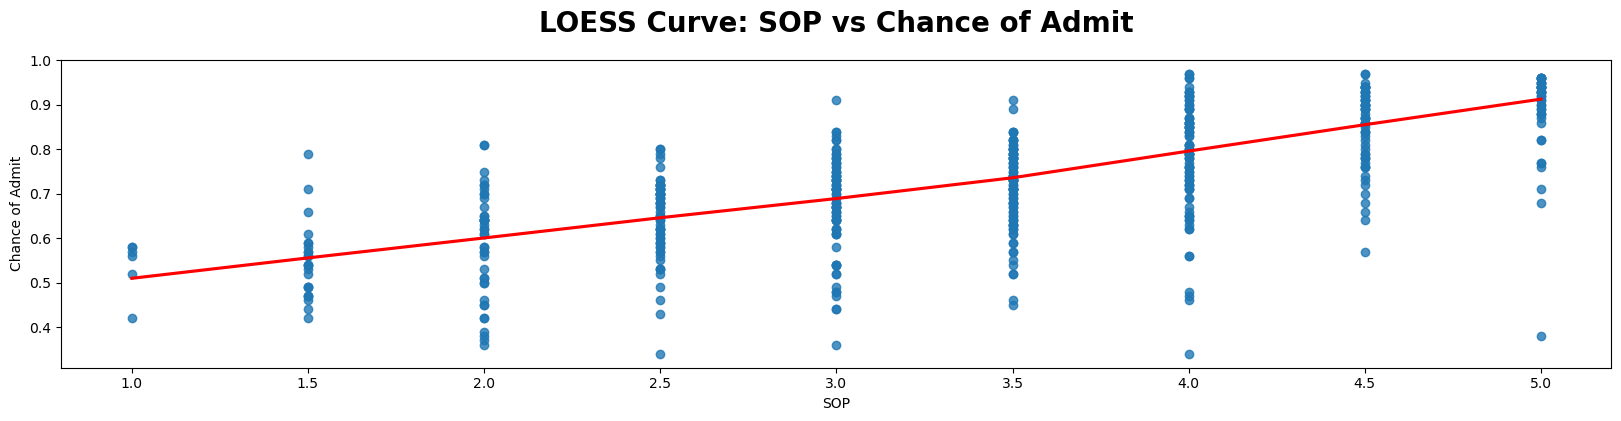

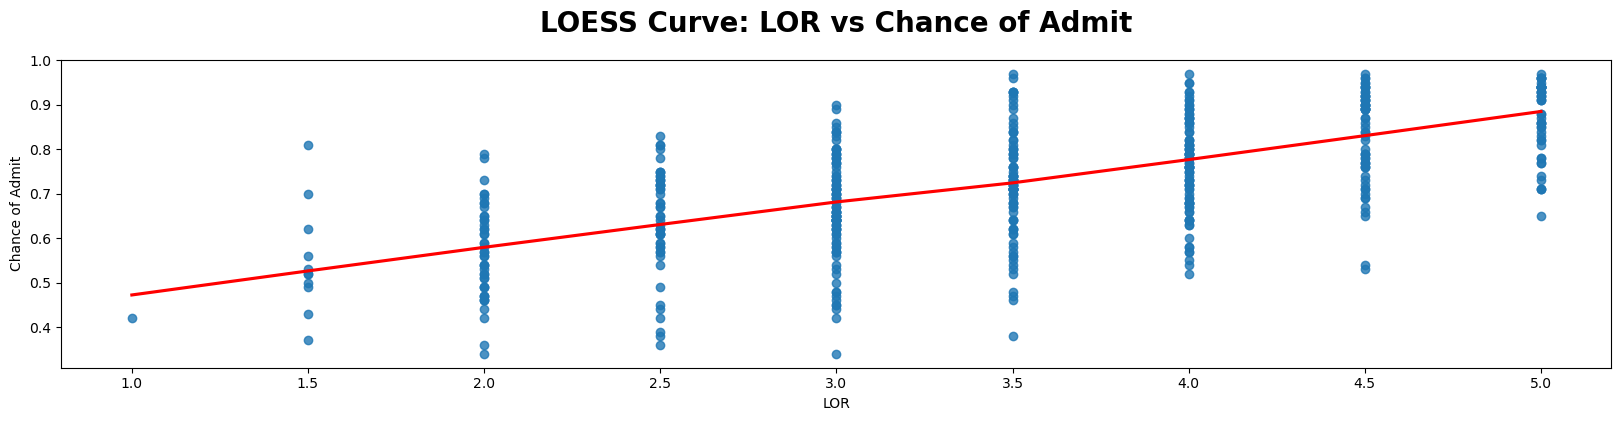

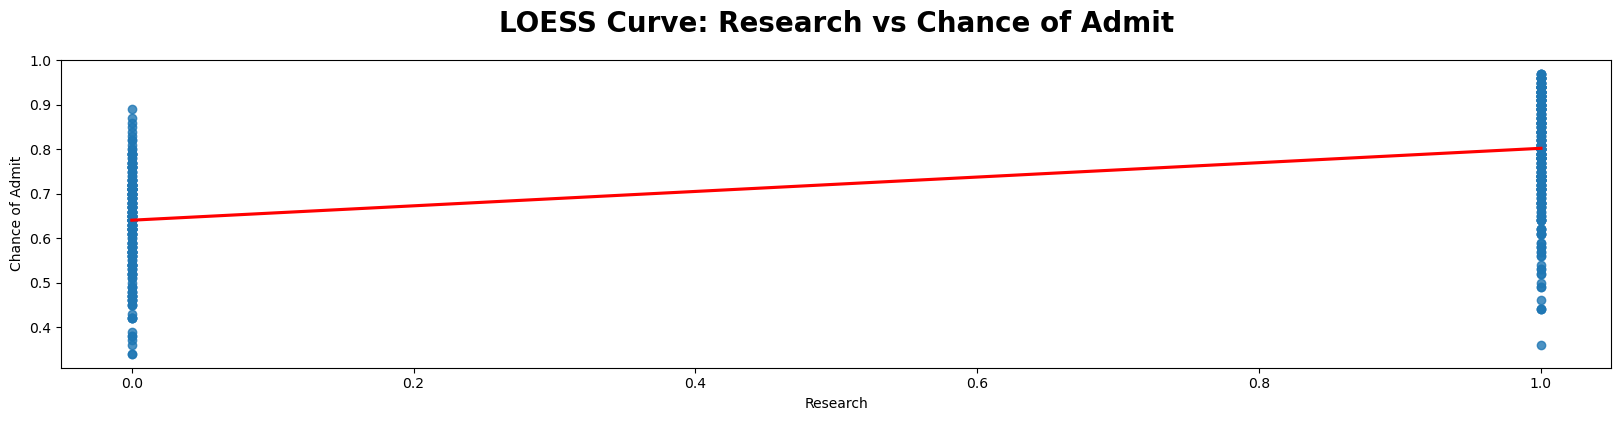

In [ ]:
# List of predictors
predictors = ['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'SOP', 'LOR', 'Research']
target = 'Chance of Admit'

for predictor in predictors:
    plt.figure(figsize=(20, 4))
    sns.regplot(x=data[predictor], y=data['Chance of Admit'], lowess=True, line_kws={'color': 'red'})
    plt.title(f'LOESS Curve: {predictor} vs Chance of Admit', fontsize=20, pad=20, fontweight='bold')
    plt.xlabel(predictor)
    plt.ylabel('Chance of Admit')
    plt.show()


<span style="color:blue">

Positive relationships between "Chance of Admit" and variables like GRE Score, TOEFL Score, and CGPA are evident.
The strength of the relationship appears strongest for CGPA, followed by GRE Score and TOEFL Score.
    
    
**CGPA vs. Chance of Admit** (highly linear)
- Strong positive relationship. Higher CGPA significantly boosts the chances of admission. Research experience further amplifies admission chances for students with higher CGPA.The relationship between CGPA and the chance of admit is highly linear, making it an excellent candidate for linear regression. The close clustering of data points around the line suggests that a linear model would fit this data well.    
        
**GRE Score vs. Chance of Admit** (as-is Linear)
- A clear positive relationship exists. The relationship appears mostly linear, but with some minor deviations. Higher GRE scores generally lead to a higher chance of admission. Students with research experience (orange) tend to have slightly higher admission chances compared to those without (blue) at similar GRE scores. At higher GRE Scores (e.g., above 330), the Chance of Admit appears to plateau near 1.0.
    
**TOEFL Score vs. Chance of Admit**
- A moderate positive relationship. Higher TOEFL scores are associated with increased chances of admission, though less pronounced than GRE scores. Research-experienced students have higher admission chances at comparable TOEFL scores.

**University Rating vs. Chance of Admit** (somewhat linear)
- Admission chances increase slightly with higher university ratings. However, the spread suggests that university rating alone does not strongly determine admission chances. Research-experienced students again show higher chances of admission across all ratings. The data points show some spread at each rating level, indicating variability in admission chances for a given rating.
The red LOESS curve suggests a moderate non-linear relationship between university rating and the chance of admit. However, the trend is generally increasing, especially after a rating of 3, indicating that higher university ratings tend to correspond with higher chances of admission. Since the curve shows a generally increasing trend, it suggests that the relationship is somewhat linear, but with some non-linearity. A linear regression might still be used, but it may not capture all the nuances of the data.

**SOP vs. Chance of Admit**
- A slight upward trend indicates that a stronger SOP might contribute to higher chances of admission. However, the relationship is weak. Research-experienced students have better admission chances even with lower SOP scores.

**LOR vs. Chance of Admit**
- Similar to SOP, stronger LORs are associated with better chances of admission, though the relationship is weak. Students with research experience have slightly higher admission chances at any given LOR strength.

**Key Question:** Are higher values of specific variables (e.g., CGPA, GRE Score) associated with a higher probability of admission?
</span>

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Multivariate Analysis of variables

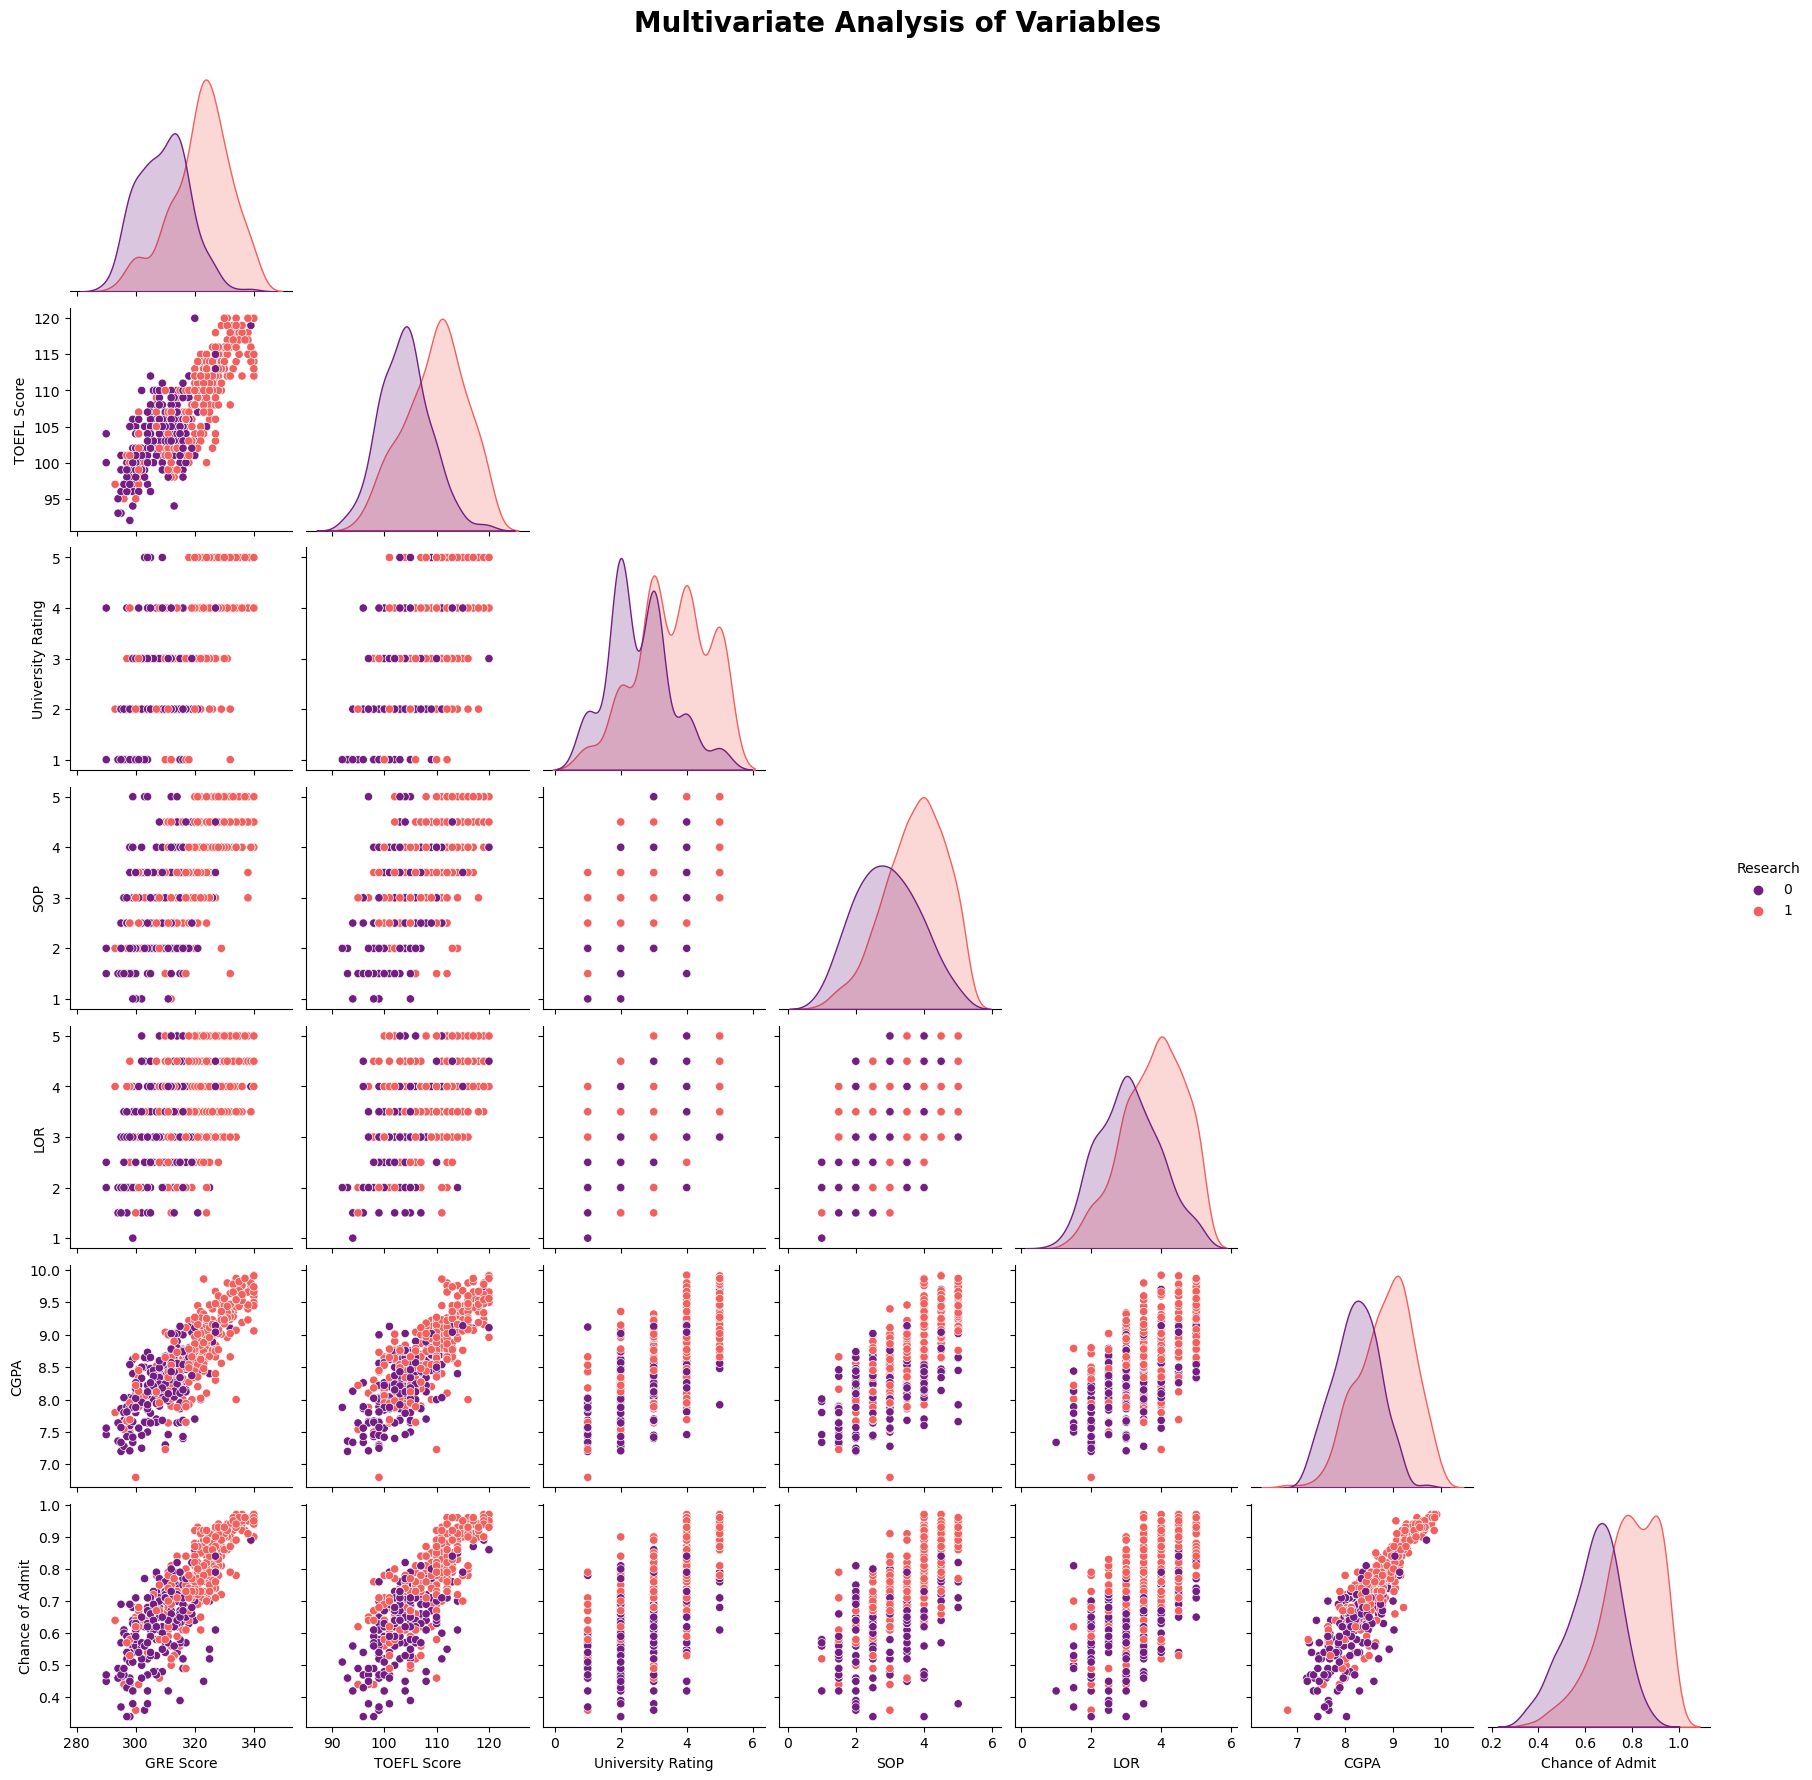

In [ ]:
# Generate pairplot for all variable combinations
sns.pairplot(data, diag_kind='kde',hue='Research', corner=True, palette='magma')  # Set diag_kind='kde' for kernel density plot on diagonal
plt.suptitle("Multivariate Analysis of Variables", y=1.02, fontsize=20, fontweight='bold')  # Add a title
plt.show()


<span style="color:blue">

- GRE Score vs. TOEFL Score: Strong positive correlation: Students with higher GRE scores tend to have higher TOEFL scores, reflecting consistent academic performance across exams.
- GRE Score vs. SOP: Slight clustering: Higher GRE scores tend to associate with stronger SOP scores, but the relationship is not strong to be a key predictor.
- GRE Score vs. CGPA: Strong positive correlation: Higher CGPA is strongly associated with higher GRE scores, indicating consistent academic excellence.
- TOEFL Score vs. CGPA: Positive correlation: Students with higher CGPA tend to score well on the TOEFL, reflecting well-rounded academic performance.
- TOEFL Score vs SOP: Quality of SOP is not always related to applicant's english skills. There seems no correlation.
- CGPA Vs SOP: There is no correlation. But applicants with higher CGPA had better quality SOPs.
- CGPA vs. Chance of Admit: Strong positive correlation: Higher CGPA significantly boosts the likelihood of admission, making it a key predictor.
- GRE Score vs. Chance of Admit: Clear positive trend: Higher GRE scores correspond to higher chances of admission, confirming its importance in the admissions process.
- TOEFL Score vs. Chance of Admit: Moderate positive correlation: Strong TOEFL scores slightly increase the likelihood of admission.
- SOP vs. Chance of Admit: Slight positive correlation: Stronger SOPs tend to correlate with higher chances of admission, though the relationship is weaker compared to quantitative scores.
- LOR vs. Chance of Admit: Moderate positive correlation: Stronger LORs enhance admission chances, emphasizing the qualitative importance of recommendations.
- Diagonal KDE Plots: Each variable's distribution indicates the spread and skewness of data, with most variables being slightly right-skewed, showing higher concentrations at competitive levels.
    </span>

## Correlation Matrix

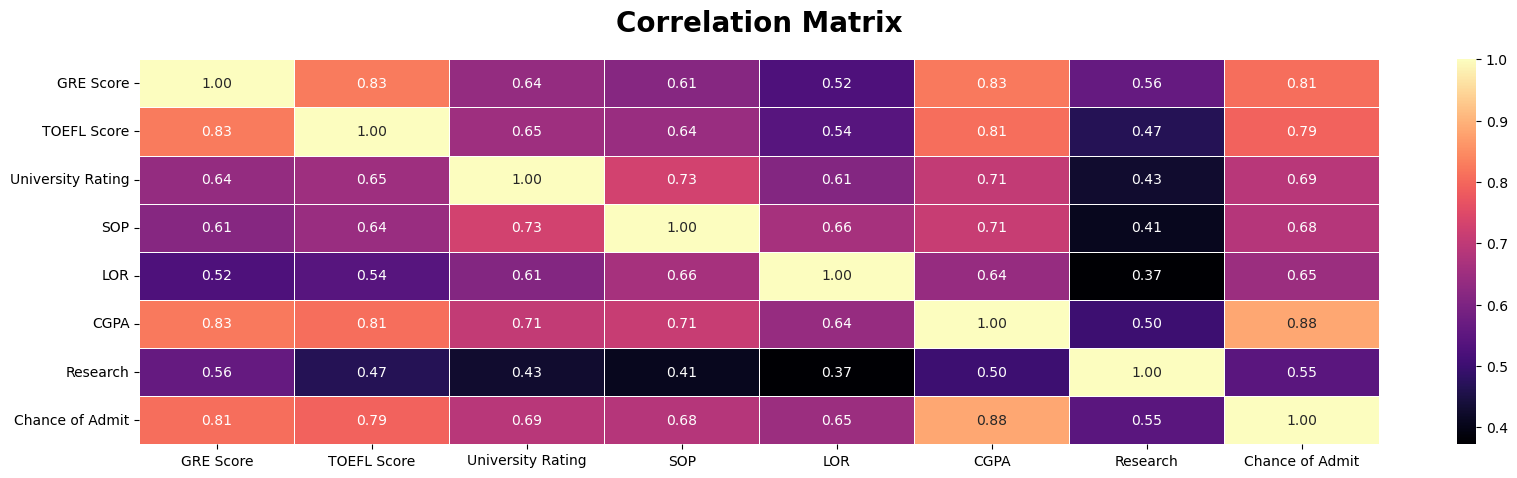


=== Correlation Analysis ===

This shows which variables are most strongly correlated with the probability of admission, helping to identify the key factors influencing it. Displays variables in descending order of correlation strength.

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit, dtype: float64


In [ ]:
# Correlation Matrix
plt.figure(figsize=(20, 5))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20, pad=20, fontweight='bold')
plt.show()

print("\n\033[1m=== Correlation Analysis ===\033[0m\n")
print("This shows which variables are most strongly correlated with the probability of admission, helping to identify the key factors influencing it. Displays variables in descending order of correlation strength.\n")

print(correlation_matrix['Chance of Admit'].sort_values(ascending=False))

# Compute correlation coefficients
correlation_with_target = data.corr()['Chance of Admit'][:-1]  # Exclude target variable itself
correlation_coefficients = dict(correlation_with_target)


<span style="color:blue">
    
**Correlation Heatmap:**

"Chance of Admit" is strongly correlated with CGPA (0.87), GRE Score (0.81), and TOEFL Score (0.79).
Other variables like "University Rating" and "LOR" also show moderate positive correlations with "Chance of Admit.". A high correlation indicates a strong linear relationship.
    
</span>

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

## Identifying Outliers using Boxplots and IQR

Using boxplots to identify outliers.

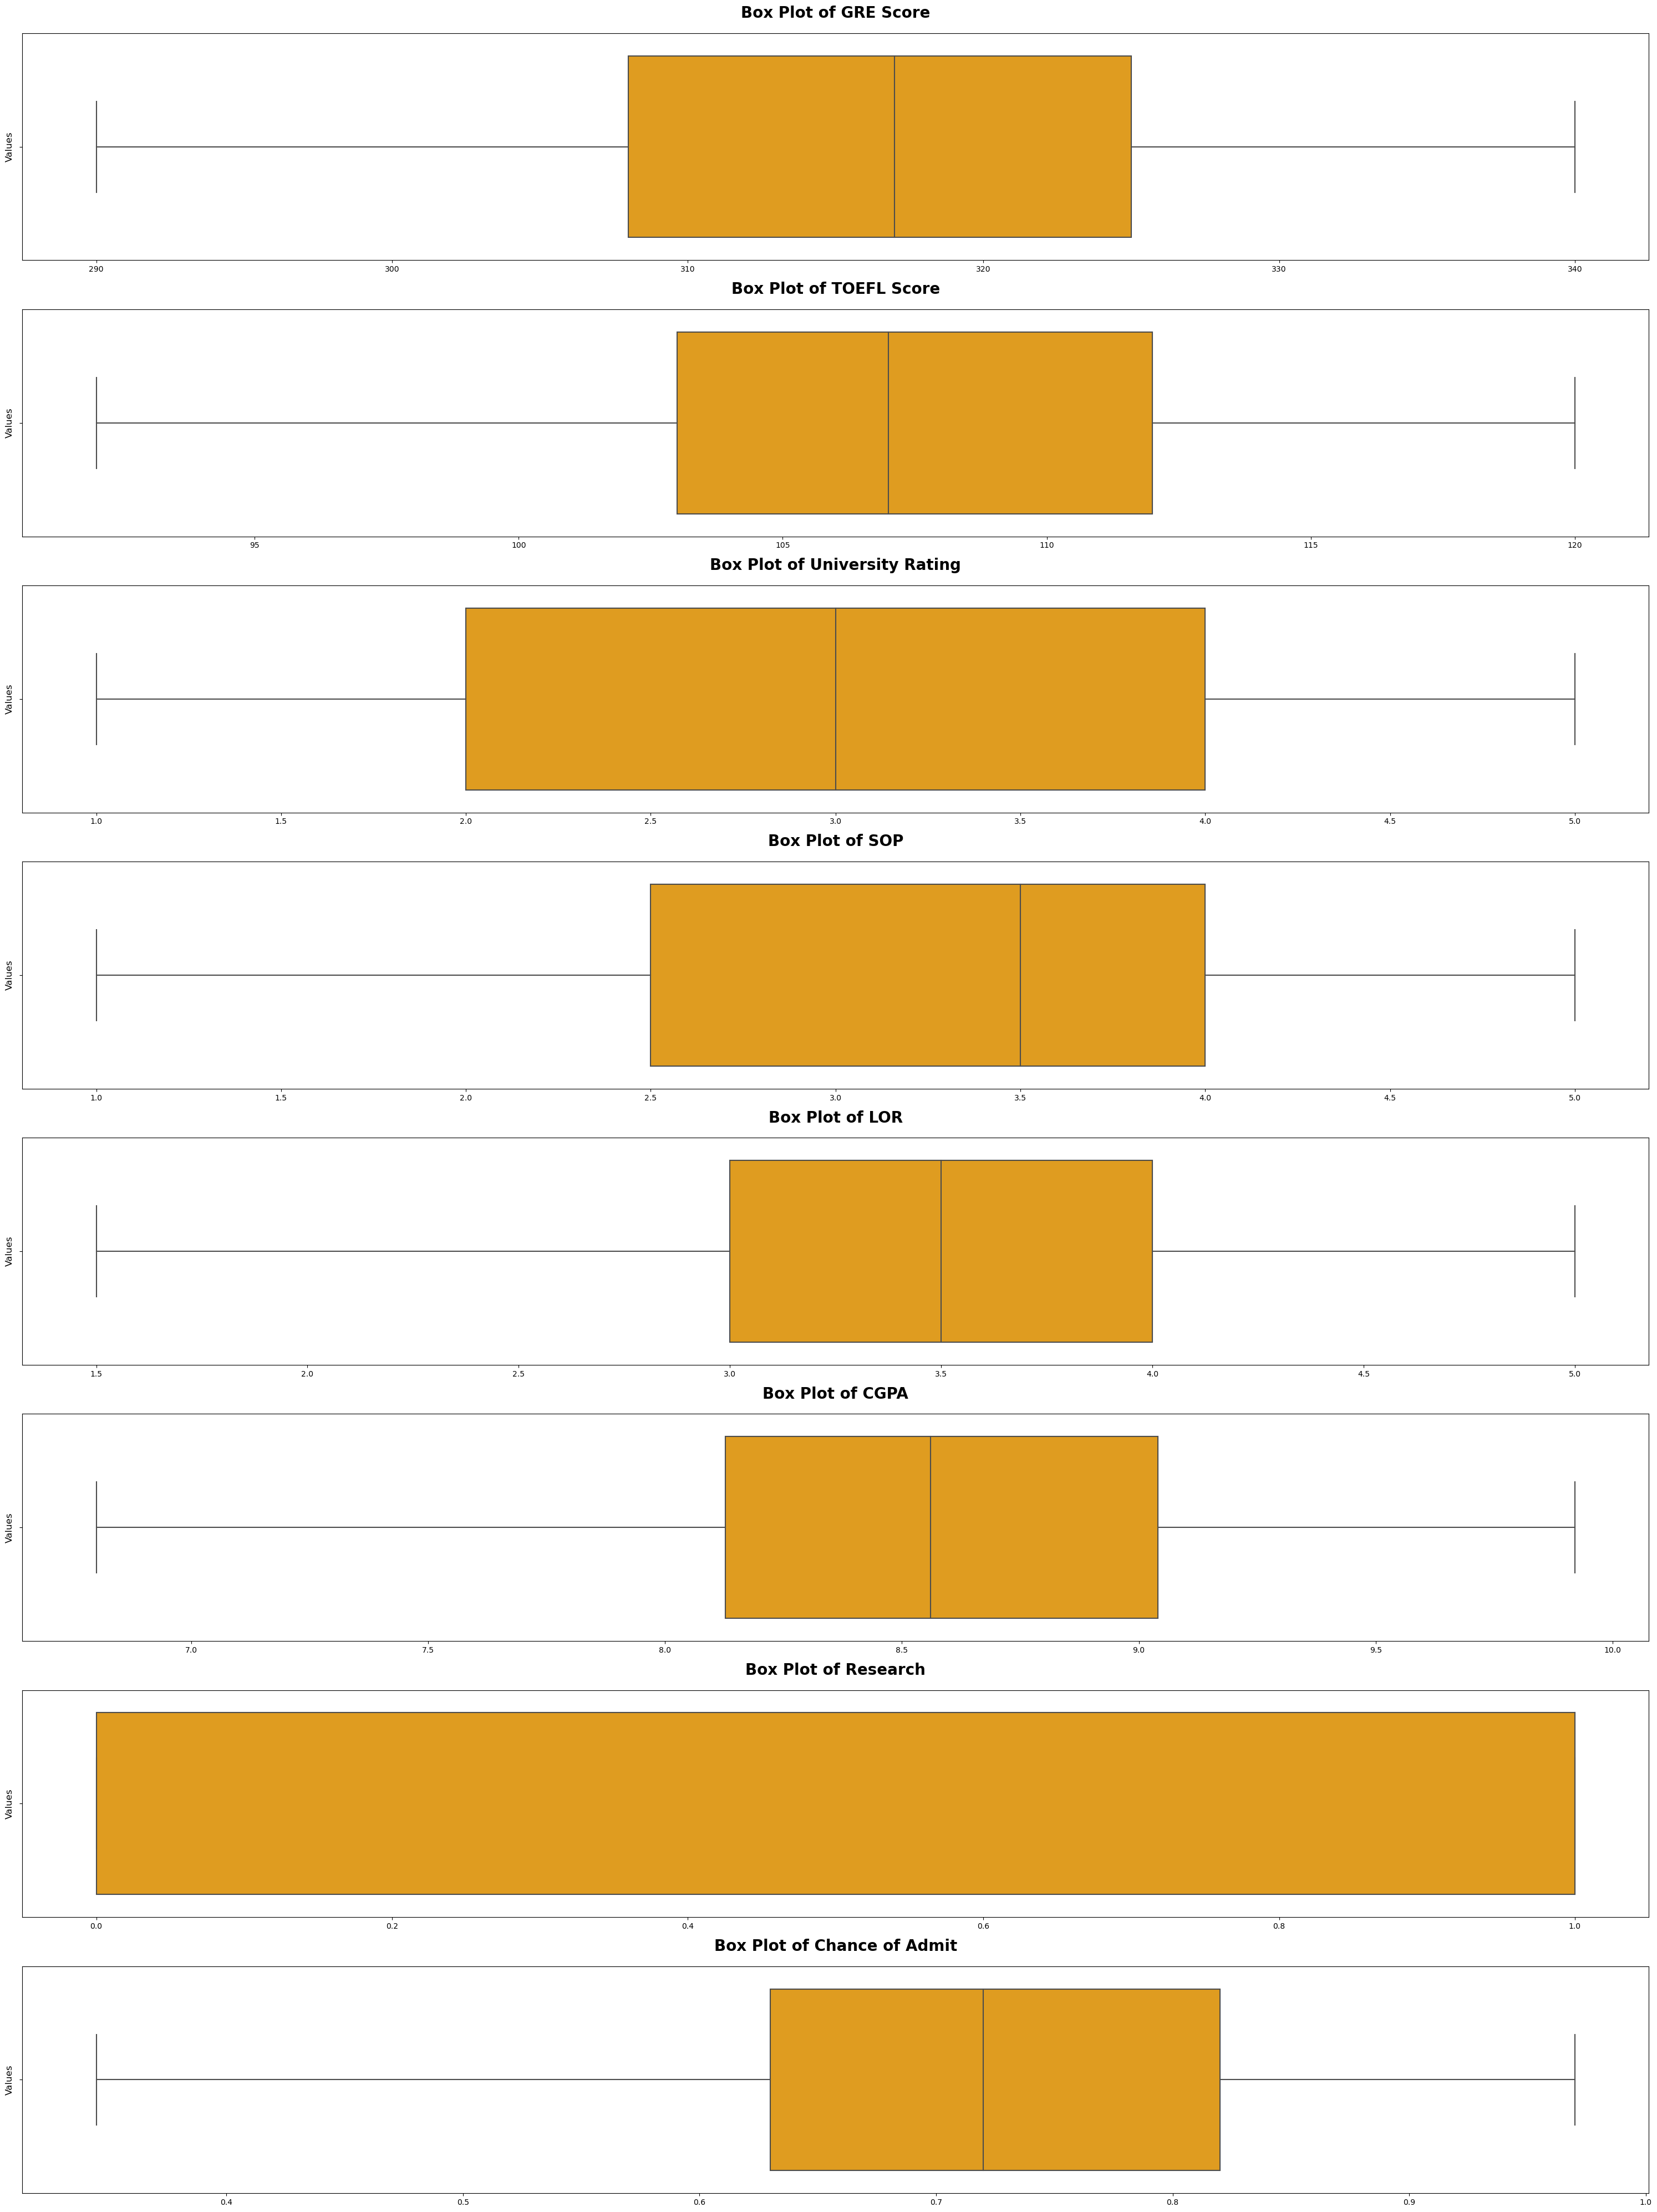

Outlier Summary (Number of Outliers Detected):
GRE Score: 0
TOEFL Score: 0
University Rating: 0
SOP: 0
LOR: 0
CGPA: 0
Research: 0
Chance of Admit: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns for creating box plots
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the grid for subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(30, 5 * len(numeric_columns)))

# Create a box plot for each numeric variable in a separate subplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i], x=data[col], color='orange')
    axes[i].set_title(f'Box Plot of {col}', fontsize=20, pad=20, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Values', fontsize=12)

plt.tight_layout()
plt.show()

# Outlier Identification: Interquartile Range (IQR) Method
outlier_summary = {}
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Display the number of outliers for each continuous variable
print("Outlier Summary (Number of Outliers Detected):")
for col, num_outliers in outlier_summary.items():
    print(f"{col}: {num_outliers}")

<span style="color:blue">
    
The box plots show relatively clean data with very few outliers, mostly for variables like LOR and Chance of Admit. The distributions highlight that the applicant pool has scores concentrated in competitive ranges for GRE, TOEFL, CGPA, and other parameters. This consistency aligns with the dataset's focus on admissions to top colleges.

Key Interpretations of Each Box Plot:
- GRE Score: The distribution is symmetrical with no visible outliers. Most scores are concentrated between 305 and 325.
- TOEFL Score: The scores are evenly distributed, with no outliers. The range is slightly smaller, with most scores between 100 and 115.
- SOP: SOP scores are evenly distributed across the range. The majority of applicants have scores between 3 and 4.
- LOR: There is a single outlier on the lower end, but the rest of the data is evenly distributed. The scores are mostly concentrated between 3 and 4.5.
- CGPA: The CGPA scores are heavily concentrated between 8 and 9.5. There are no visible outliers, and the distribution is symmetrical.
- Chance of Admit: The range is between 0.4 and 1.0, with one outlier on the lower side. Most values are distributed around 0.6 to 0.8, indicating higher chances for a majority.
  </span>

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Data Preprocessing

## Checking Duplicate Values

In [ ]:
print("\nNumber of Duplicate Rows:", data.duplicated().sum())


Number of Duplicate Rows: 0


<span style="color:blue"> There are no duplicates in the dataset </span>

## Missing Value Treatment

In [ ]:
print("\nMissing Values in Each Column:\n", data.isnull().sum())


Missing Values in Each Column:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


<span style="color:blue"> There are no missing values in the dataset </span>

## Treating Outliers

There are very less number of outliers. IQR Capping (or Winsorization) is a method to address extreme outliers by replacing them with the nearest threshold values (based on the IQR rule). This ensures that the extreme values are brought within a reasonable range while preserving the data structure. This process caps the extreme values at the calculated bounds, ensuring outliers are treated while retaining their influence in the dataset.

In [ ]:
# Function to apply Winsorization using IQR
def winsorize_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply Winsorization to the specified columns
data["LOR"] = winsorize_iqr(data["LOR"])
data["Chance of Admit"] = winsorize_iqr(data["Chance of Admit"])

print("The winsorized summary statistics for LOR and Chance of Admit columns\n")
print("---------The winsorized summary statistics for LOR-----------")
print(data["LOR"].describe())

print("\n---------The winsorized summary statistics for Chance of Admit-----------")
print(data["Chance of Admit"].describe())

# Identify numeric columns for creating box plots
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Outlier Identification: Interquartile Range (IQR) Method
outlier_summary = {}
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Display the number of outliers for each continuous variable
print("\n\n-----------Outlier Summary (Number of Outliers Detected):-------------")
for col, num_outliers in outlier_summary.items():
    print(f"{col}: {num_outliers}")

The winsorized summary statistics for LOR and Chance of Admit columns

---------The winsorized summary statistics for LOR-----------
count    500.000000
mean       3.485000
std        0.923027
min        1.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: LOR, dtype: float64

---------The winsorized summary statistics for Chance of Admit-----------
count    500.000000
mean       0.721760
std        0.141087
min        0.345000
25%        0.630000
50%        0.720000
75%        0.820000
max        0.970000
Name: Chance of Admit, dtype: float64


-----------Outlier Summary (Number of Outliers Detected):-------------
GRE Score: 0
TOEFL Score: 0
University Rating: 0
SOP: 0
LOR: 0
CGPA: 0
Research: 0
Chance of Admit: 0


<span style="color:blue"> The outliers have been treated with Winzorisation/IQR mapping method. </span>

## Feature Engineering: Identifying Correlated Variables

Highly Correlated variables are below

In [ ]:
print("\n\033[1m=== Correlation Analysis ===\033[0m\n")
print("This shows which variables are most strongly correlated with the probability of admission, helping to identify the key factors influencing it. Displays variables in descending order of correlation strength.\n")

print(correlation_matrix['Chance of Admit'].sort_values(ascending=False))



=== Correlation Analysis ===

This shows which variables are most strongly correlated with the probability of admission, helping to identify the key factors influencing it. Displays variables in descending order of correlation strength.

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit, dtype: float64


## Feature Engineering: Adding custom features

1. Strong Profile Indicator: a binary variable to indicate whether a candidate has a strong profile.
2. Language and Academic Combined: Average of TOEFL Score and CGPA to assess overall strength.

In [ ]:
# Create the Strong_Profile column based on the given conditions
#data['Strong_Profile'] = (((data['GRE Score'] >= 320) | (data['TOEFL Score'] >= 107)) & (data['Research'] == 1)).astype(int)
#data['Language_Academic_Strength'] = (data['TOEFL Score'] + data['CGPA']) / 2

## Feature Engineering: Encoding Categorical Variables

Categorical Variables in the Dataset. No encoding required as the variables are already in numeric formats.
- Research (Binary: 0 or 1)
- University Rating (Ordinal: 1 to 5)
- SOP
- LOR

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Transforming Target Variable

Target variable shows right skewed distributions. Applying a log transformation to normalize the target variable for better linear model performance. But there are very less outliers and so this step wont be required.

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Train Test Data Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define the independent (X) and dependent (y) variables
X = data.drop(columns=['Chance of Admit'], axis=1)  # Exclude the target variable
y = data['Chance of Admit']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train
y_train

0      0.77
1      0.71
2      0.62
3      0.72
4      0.75
       ... 
395    0.87
396    0.72
397    0.57
398    0.55
399    0.62
Name: Chance of Admit, Length: 400, dtype: float64

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Feature Engineering: Standardising continuous variables of train data

Standardising train data. Applying same standardisation on test data also

In [ ]:
# creating a copy of the dataset before standardisation
data_copy = data.copy()

In [ ]:
# Performing Standardisation
from sklearn.preprocessing import StandardScaler
X_train_columns = X_train.columns
X_test_columns = X_test.columns
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

# Creating train data again from standardised dataset
X_train = pd.DataFrame(X_train_std, columns=X_train_columns)
X_test = pd.DataFrame(X_test_std, columns=X_test_columns)

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Mode Building: Linear, Lasso and Ridge Regresssion Models

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the StandardScaler
std = StandardScaler()

# Fit and transform the training data
X_train_scaled = std.fit_transform(X_train)

# Transform the test data
X_test_scaled = std.transform(X_test)

# Initialize the Regression models
models = [
    ['Linear Regression:', LinearRegression()],
    ['Lasso Regression:', Lasso(alpha=0.1)],
    ['Ridge Regression:', Ridge(alpha=1.0)]
]

print("-----------Model performance results without removing features with multicollinearity---------\n\n")

for name, model in models:
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train.values)

    # Make predictions on the scaled test set
    predictions = model.predict(X_test_scaled)

    # Evaluate the model's performance
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Print performance metrics
    print(f"{name}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("-" * 50)

-----------Model performance results without removing features with multicollinearity---------


Linear Regression:
Mean Absolute Error (MAE): 0.0428
Root Mean Squared Error (RMSE): 0.0609
R-squared (R²): 0.8187
--------------------------------------------------
Lasso Regression:
Mean Absolute Error (MAE): 0.0982
Root Mean Squared Error (RMSE): 0.1225
R-squared (R²): 0.2666
--------------------------------------------------
Ridge Regression:
Mean Absolute Error (MAE): 0.0428
Root Mean Squared Error (RMSE): 0.0609
R-squared (R²): 0.8187
--------------------------------------------------


# Linear Regression using statsmodel library

Key Outputs from OLS:

- Coefficients: Estimated effect of each independent variable on the dependent variable.
- p-values: Significance of each coefficient.
- R-squared: Proportion of variance in the dependent variable explained by the model.
- Adjusted R-squared: Adjusted for the number of predictors in the model.
- F-statistic: Indicates whether the overall model is statistically significant.

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # Independent Variables
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.4
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          2.54e-142
Time:                        12:46:27   Log-Likelihood:                 562.41
No. Observations:                 400   AIC:                            -1109.
Df Residuals:                     392   BIC:                            -1077.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

<span style="color:blue"> From the model summary, it is clear that SOP column has the lowest coef and highest p_value of 0.728 greater than the significance value. It is not important for predicting admissions or it is not a predictor of the admissions. Therefore this feature/column can be dropped from the model. </span>

# Dropping SOP column

Dropping SOP column from train and test data for consistency

In [ ]:
# Drop the column 'SOP' from X_train if it exists
if 'SOP' in X_train.columns:
    X_train_new = X_train.drop(columns='SOP', axis=1)
    # Drop the column 'SOP' from X_test if it exists
    if 'SOP' in X_test.columns:
        X_test = X_test.drop(columns='SOP', axis=1)

# Rebuilding the model

Building the regression model again with the removed feature.

In [ ]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.4
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          2.54e-142
Time:                        12:46:28   Log-Likelihood:                 562.41
No. Observations:                 400   AIC:                            -1109.
Df Residuals:                     392   BIC:                            -1077.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

# Diagnostic: Handling Multicollinearity using Variance Inflation Factor

Evaluating multicollinearity to decide whether to drop or retain variables.The Variance Inflation Factor (VIF) score of an independent variable indicates how well the variable is explained by other independent variables. More closer the R2 score is to 1, the higher the value of VIF and the higher the multi colinearity with the particular independent variable.

**Interpreting VIF:** Identify predictors with VIF > 5 (high multicollinearity) or between 4-5 (moderate multicollinearity). Retain variables if multicollinearity is manageable or drop if it's excessive.


In [ ]:
# Using the new model without feature SOP
X_train_new

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,0.389986,0.602418,-0.098298,0.564984,0.415018,0.895434
1,1.0,-0.066405,0.602418,0.775459,1.651491,-0.067852,-1.116777
2,1.0,-1.253022,-0.876917,-0.098298,-0.521524,-0.134454,-1.116777
3,1.0,-0.248961,-0.055064,-0.972054,0.564984,-0.517420,-1.116777
4,1.0,-0.796631,-0.219435,-0.098298,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
395,1.0,1.120212,0.602418,0.775459,1.108237,0.997792,0.895434
396,1.0,-0.979187,-0.383805,-0.972054,-0.521524,-0.600673,0.895434
397,1.0,-1.344300,-1.370029,-1.845810,-1.608031,-2.215790,-1.116777
398,1.0,-0.705353,-0.383805,-0.972054,0.564984,-1.499810,-1.116777


In [ ]:
# Generating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

# Prepare data for multicollinearity check (excluding the target variable)
X_vif = X_train_new.copy()  # Independent variables

# Handle any categorical variables if present. No need to generate VIF for categorical variables
X_vif = pd.get_dummies(X_vif, drop_first=True)

# Add a constant column for VIF calculation
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature, excluding the constant term
vif_data = pd.DataFrame({
    'Variable': X_vif.columns[1:],  # Exclude the constant term
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(1, X_vif.shape[1])]
})

# Display VIF scores
print("\n=========Variance Inflation Factor (VIF) Scores:=========")
#print(vif_data)
vif_data


=========Variance Inflation Factor (VIF) Scores:=========


,Variable,VIF
0,GRE Score,4.485768
1,TOEFL Score,3.616758
2,University Rating,2.277656
3,LOR,1.802320
4,CGPA,4.478270
5,Research,1.517768


<span style="color:blue">
    
**VIF Findings:**
    
GRE Score and CGPA have relatively high VIF values (around 4.5–4.8), but they are below the critical threshold of 5.
**This suggests that multicollinearity is manageable and does not necessitate dropping these variables.**
Other predictors have VIF scores well within acceptable limits, indicating low multicollinearity.

1. GRE Score and CGPA have VIF values in the range of 4.5–4.8, indicating manageable multicollinearity.
2. Other predictors have VIF scores well within acceptable limits
    
We can go ahead with predictions

</span>

# Making Predictions on Test data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the StandardScaler
sc = StandardScaler()

# Fit and transform the training data
X_train_new_std = sc.fit_transform(X_train_new)
X_train_new_std = pd.DataFrame(X_train_new_std, columns=X_train_new.columns)
X_test_new_std = sc.fit_transform(X_test)

# Prediction directly on unscaled test data
# Note: Ensure the test data `X_test` has the same structure as `X_train_new`
y_pred = model1.predict(X_test_new_std)

# Coefficients of the model
print("\nModel Coefficients:")
for feature, coef in zip(X_train_new.columns, model1.params):  # Use original feature names
    print(f"{feature}: {coef:.4f}")



Model Coefficients:
const: 0.7242
GRE Score: 0.0266
TOEFL Score: 0.0184
University Rating: 0.0035
LOR: 0.0163
CGPA: 0.0680
Research: 0.0120


<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Diagnostics Check

- Check for multicollinearity using correlation and VIF scores.

# Feature Importance Matrix

By combining correlation analysis, regression analysis, and feature importance methods, the most impactful factors in graduate admissions can be identified. This matrix shows below for every variable:
- Regression Coefficients: Regression Model Parameters or weights. Reflect the impact of each variable on the target.
- P-Values: Indicate statistical significance (variables with p-values < 0.05 are significant).
- Correlation Coefficient: Measures linear relationships with the target.


<span style="color:blue">
The coefficients indicate the strength and direction of the impact.
</span>

In [ ]:
import pandas as pd

# Variables, feature importance, regression coefficients, and correlation values
variables = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

# Initialize the lists with placeholder values (e.g., 0)
feature_importance = [0] * len(variables)
regression_coefficients = [0] * len(variables)
p_values = [0] * len(variables)
correlation_with_target = [0] * len(variables)

# Placeholder DataFrame (Optional, for structure clarity)
features_results_df = pd.DataFrame({
    'Variable': variables,
    'Feature Importance': feature_importance,
    'Regression Coefficient': regression_coefficients,
    'P-Value': p_values,
    'Correlation Coefficient': correlation_with_target
})

# Extracting existing data from OLS (model1) and correlations
# Assuming `model1` is an OLS model and `X_train_new` is the input DataFrame
regression_coefficients = dict(zip(X_train_new.columns, model1.params))  # OLS regression coefficients
p_values = dict(zip(X_train_new.columns, model1.pvalues))  # P-values from OLS regression

# Compute Correlation Coefficients
correlation_with_target = data.corr()['Chance of Admit']  # Correlation with the target variable
correlation_coefficients = dict(correlation_with_target)

# Combine all results into a DataFrame
results_df = pd.DataFrame({
    'Variable': X_train_new.columns,
    'Regression Coefficient': X_train_new.columns.map(regression_coefficients),
    'P-Value': X_train_new.columns.map(p_values),
    'Correlation Coefficient': X_train_new.columns.map(correlation_coefficients)
})

# Strip any leading/trailing spaces from the 'Variable' column (for safety)
results_df['Variable'] = results_df['Variable'].str.strip()

# Remove the row for 'const' (if present)
results_df = results_df[results_df['Variable'] != 'const']

# Round off the P-Value to 4 decimal places
results_df['P-Value'] = results_df['P-Value'].round(4)

# Sort results by Regression Coefficient in descending order for better visualization
results_df.sort_values(by='Regression Coefficient', ascending=False, inplace=True)

# Display the results DataFrame
results_df


,Variable,Regression Coefficient,P-Value,Correlation Coefficient
5,CGPA,0.068043,0.0000,0.882551
1,GRE Score,0.026568,0.0000,0.810421
2,TOEFL Score,0.018433,0.0013,0.792292
4,LOR,0.016304,0.0001,0.644832
6,Research,0.011954,0.0013,0.545919
3,University Rating,0.003535,0.4342,0.690257


<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Model Assumptions Testing

## i) Checking Linearity of Predictors

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


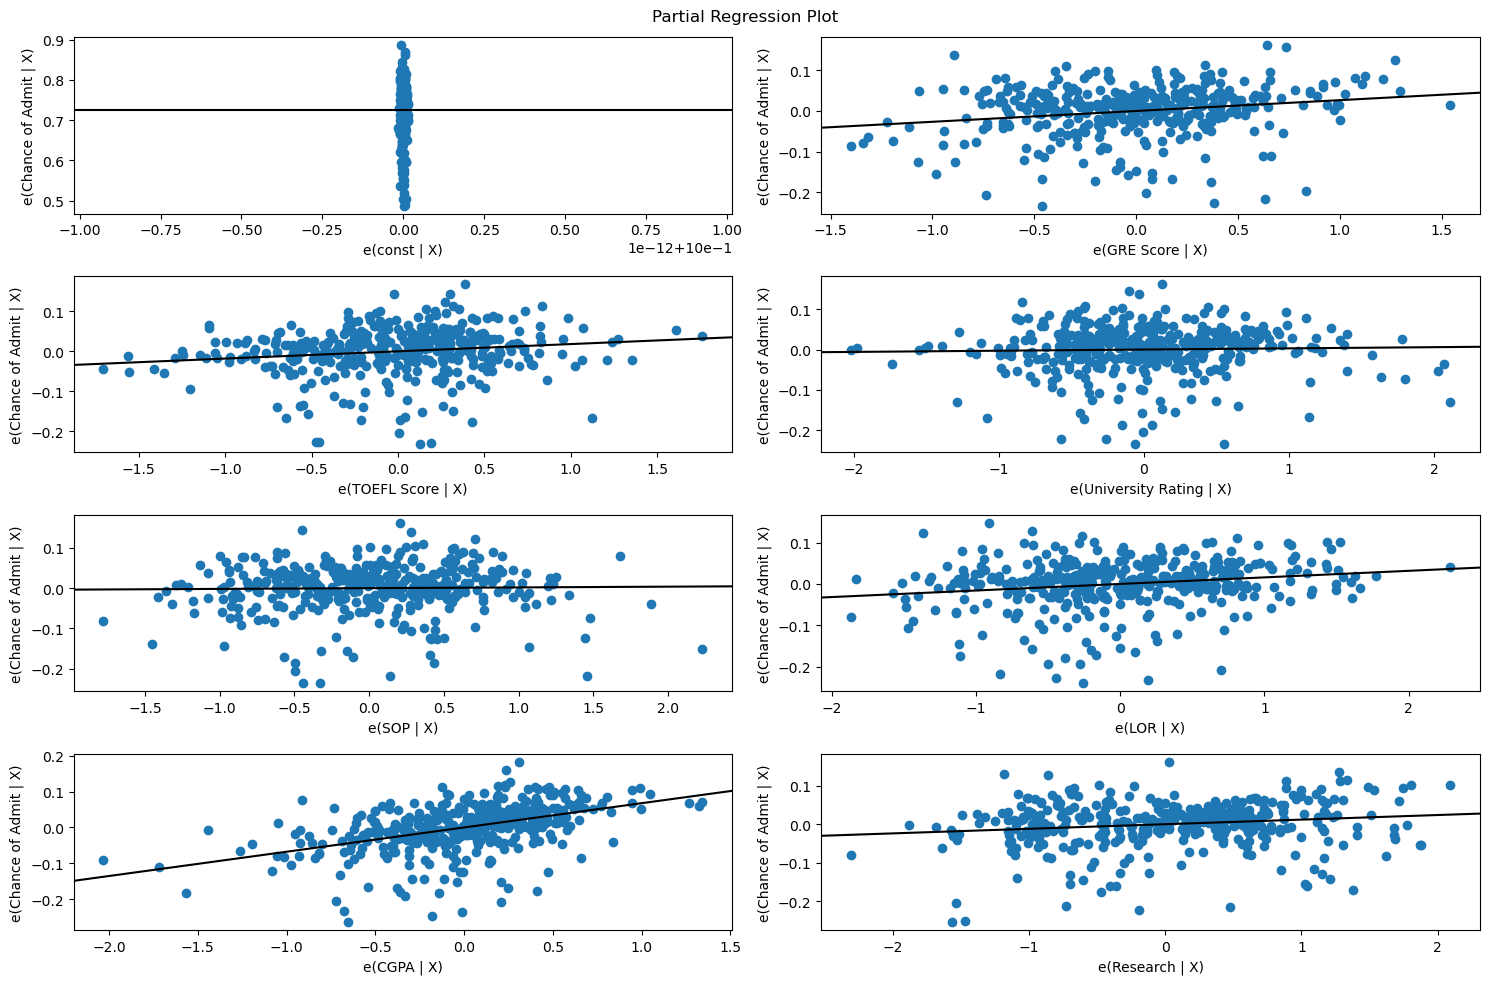

In [ ]:
# Using Partial Regression Plots
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

X_train_linearity = X_train
y_train_linearity = y_train

# Fit the OLS model
model_linearity = sm.OLS(y_train_linearity, X_train_linearity).fit()

# Generate Partial Regression Plots
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_partregress_grid(model_linearity, fig=fig)

plt.tight_layout()
plt.show()


**Key Observations for Each Predictor:**

Partial Regression Plots provide a detailed visualization of how each predictor affects the target variable (Chance of Admit) while accounting for the influence of other predictors.

- GRE Score: The plot for GRE Score shows a positive linear trend. This indicates that higher GRE scores consistently contribute to an increased Chance of Admit.
- TOEFL Score: Similar to GRE Score, the plot for TOEFL Score also shows a positive trend, though it appears slightly less pronounced. This suggests that TOEFL Score is an important predictor but has a smaller individual impact compared to GRE Score.
- University Rating: The plot shows a modest positive relationship with Chance of Admit. There is some variability, but overall, a higher university rating tends to improve the chance of admission.
- SOP (Statement of Purpose): The relationship is weaker compared to GRE and TOEFL scores, with some scatter. However, there is still a slight positive linear trend, indicating that a stronger SOP marginally contributes to a better Chance of Admit.
- LOR (Letter of Recommendation): The plot shows a positive linear relationship with Chance of Admit, similar to SOP. Stronger recommendation letters tend to increase admission chances, but the effect is moderate.
- CGPA (Cumulative GPA): CGPA shows a strong positive linear relationship with Chance of Admit. This is one of the most important predictors in the dataset, as evident from the clear upward trend.
- Research: The Research variable has a positive linear relationship with Chance of Admit, but the effect appears less pronounced compared to GRE or CGPA. Conducting research increases the probability of admission slightly.

## ii) Checking Normality of Residuals

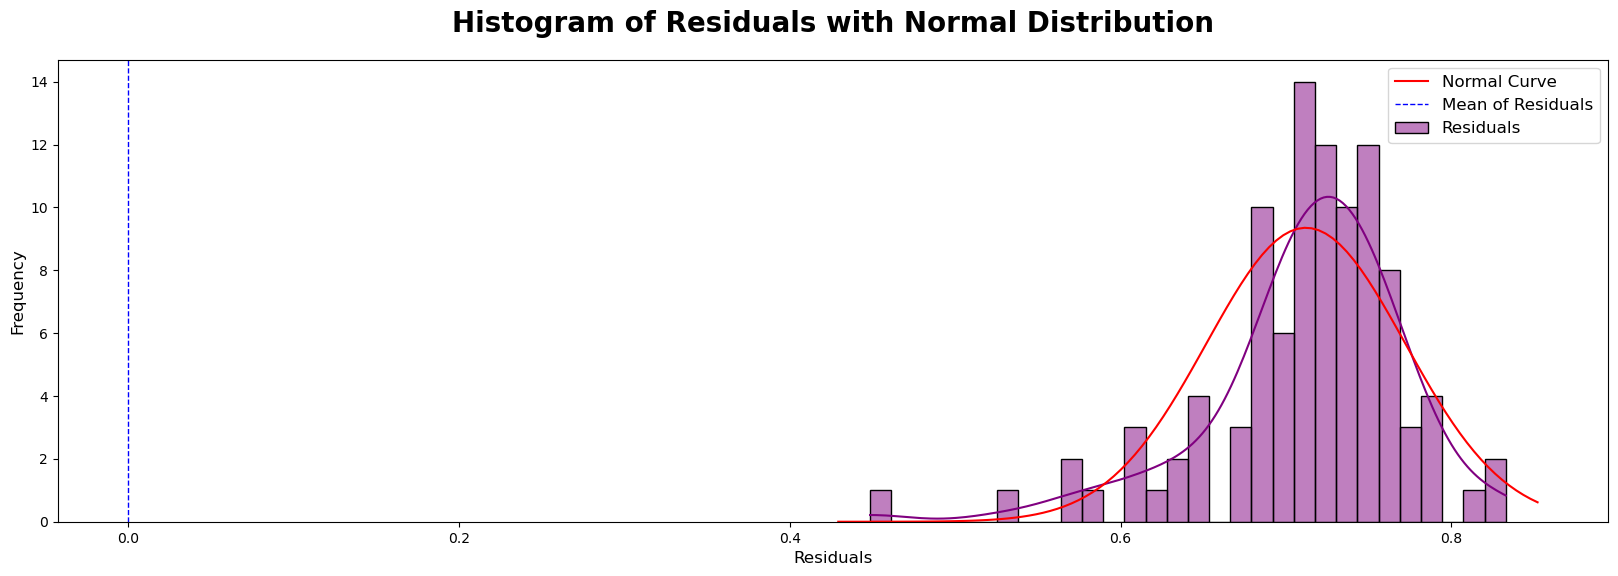

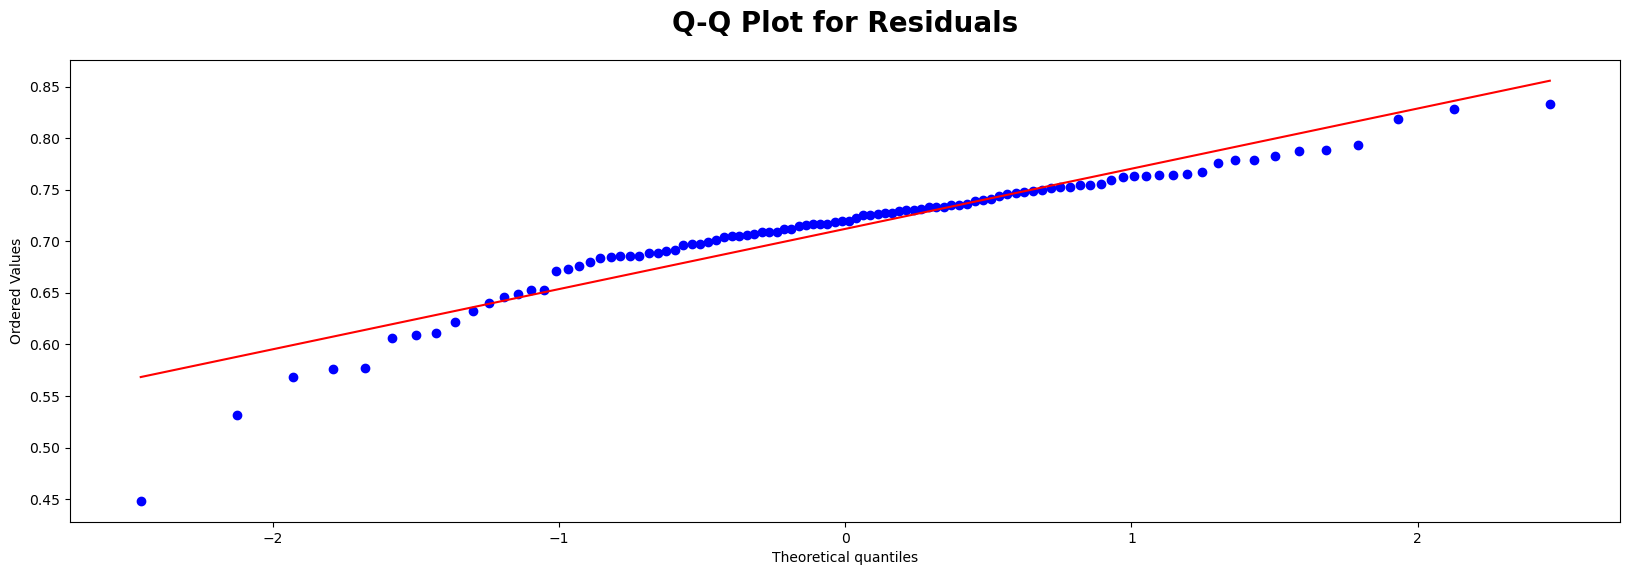



========Shapiro-Wilk Test for Normality========

Statistic: 0.9116, p-value: 0.0000
Residuals do not follow a normal distribution (p <= 0.05)


In [ ]:
from scipy.stats import norm

# Residuals
residuals = y_test.values - y_pred

# Plot histogram with KDE and normal distribution curve
plt.figure(figsize=(20, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple', label='Residuals')
xmin, xmax = plt.xlim()

# Add a normal distribution curve
mean = np.mean(residuals)
std_dev = np.std(residuals)
x = np.linspace(xmin, xmax, 100)
normal_curve = norm.pdf(x, mean, std_dev)
plt.plot(x, normal_curve * len(residuals) * (xmax - xmin) / 30, label='Normal Curve', color='red')

# Add title and labels
plt.title("Histogram of Residuals with Normal Distribution", fontsize=20, pad=20, fontweight='bold')
plt.axvline(0, color='blue', linestyle='--', linewidth=1, label='Mean of Residuals')
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)
plt.show()

# Q-Q plot for normality of residuals
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals", fontsize=20, pad=20, fontweight='bold')
plt.show()

from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p = shapiro(residuals)
print("\n\n========Shapiro-Wilk Test for Normality========\n")
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

if p > 0.05:
    print("Residuals follow a normal distribution (p > 0.05)")
else:
    print("Residuals do not follow a normal distribution (p <= 0.05)")


<span style="color:blue"> Residuals are deviating from normality. The normality assumption of residuals for linear regression is violated, which could affect hypothesis testing and confidence intervals.</span>

## iii) Checking Mean of Residuals

Checking the mean of residuals is an essential step to verify that the residuals (errors) are centered around zero. This is a fundamental assumption of linear regression models. Ensures that the model predictions are unbiased.

In [ ]:
residuals = y_test.values
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.7120000000000001


## iv) Test for Homoscedasticity

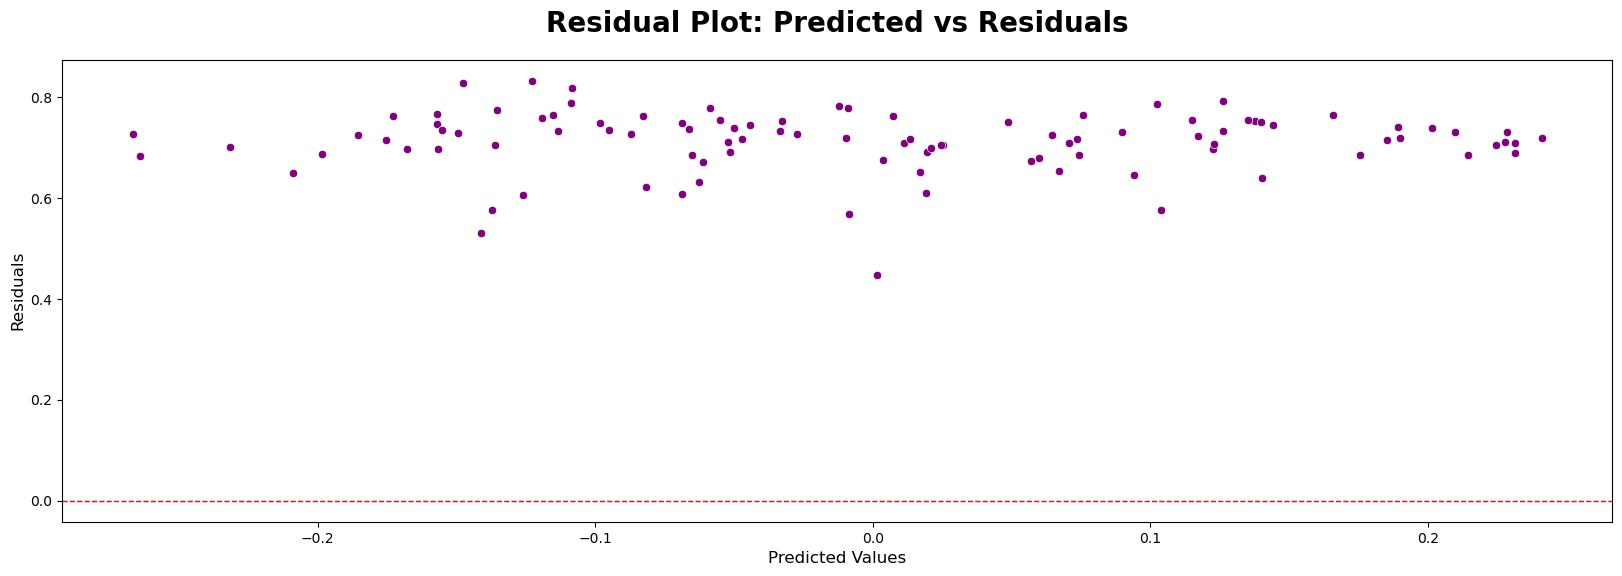

In [ ]:

# Residuals
residuals = y_test - y_pred

# Residual plot: Predicted vs Residuals
plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot: Predicted vs Residuals", fontsize=20, pad=20, fontweight='bold')
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.show()


<span style="color:blue">
    
- The residuals are not entirely randomly distributed. There appears to be some structure or clustering in the residuals.
- Potential Heteroscedasticity: The spread of residuals seems to vary slightly across predicted values. This suggests potential heteroscedasticity (non-constant variance of residuals). If present, heteroscedasticity violates one of the key assumptions of OLS regression and may lead to inefficient estimates of coefficients and incorrect confidence intervals.
- The lack of random scatter suggests that the relationship between some predictors and the target variable might not be linear.
</span>

## v) Checking for Multicollinearity using VIF (Variable Inflation Factor)

Identifying and handling multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Prepare data for multicollinearity check
X_vif = X_train_new.copy()

# Add a constant column for VIF calculation
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame({
    'Variable': X_vif.columns[1:],  # Exclude the constant term
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(1, X_vif.shape[1])]
})

# Display VIF scores
print("Variance Inflation Factor (VIF) Scores:")
print(vif_data)


Variance Inflation Factor (VIF) Scores:
            Variable       VIF
0          GRE Score  4.485768
1        TOEFL Score  3.616758
2  University Rating  2.277656
3                LOR  1.802320
4               CGPA  4.478270
5           Research  1.517768


<span style="color:blue"> The VIF scores indicate that multicollinearity is not a major issue in the model. All predictors are contributing independently without substantial overlap. </span>

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Model Performance Evaluations

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred = model1.predict(X_train_new)  # Training predictions
y_test_pred = model1.predict(X_test)       # Test predictions

# Mean of target variable for training and test sets
mean_y_train = y_train.mean()
mean_y_test = y_test.mean()

# Training performance
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train_new.shape[1] - 1)
error_rate_per_train = (mae_train / mean_y_train) * 100

# Test performance
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
error_rate_per_test = (mae_test / mean_y_test) * 100

# Display metrics
print("\n\n===========Model Performance Train Data Metrics:============\n")
print(f"MAE: {mae_train:.4f}, \nRMSE: {rmse_train:.4f}, \nR²: {r2_train:.4f}, \nAdjusted R²: {adj_r2_train:.4f}")
print(f"Training Error Rate (MAE): {error_rate_per_train:.2f}%")

print("\n\n===========Model Performance Test Data Metrics:=================\n")
print(f"MAE: {mae_test:.4f}, \nRMSE: {rmse_test:.4f}, \nR²: {r2_test:.4f}, \nAdjusted R²: {adj_r2_test:.4f}")
print(f"Test Error Rate (MAE): {error_rate_per_test:.2f}%")




===========Model Performance Train Data Metrics:============

MAE: 0.0425, 
RMSE: 0.0593, 
R²: 0.8213, 
Adjusted R²: 0.8181
Training Error Rate (MAE): 5.87%


===========Model Performance Test Data Metrics:=================

MAE: 0.0428, 
RMSE: 0.0609, 
R²: 0.8187, 
Adjusted R²: 0.8049
Test Error Rate (MAE): 6.01%


## a) Metrics Captured

- **Mean Absolute Error (MAE):** Measures the average magnitude of errors. Lower values indicate better model performance.
- **Root Mean Squared Error (RMSE):** Penalizes larger errors more than MAE and measures the standard deviation of residuals. Lower values are better.
- **R2-squared:** Represents the proportion of variance in the target variable explained by the model. Higher is better.
- **Adjusted R2-squared:** Adjusts based on the number of predictors in the model, penalizing excessive predictors.
- **Training Error Rate:** Indicates how well the model fits the training data.
- **Test Error Rate:** Indicates how well the model generalizes to unseen data.

##  b) Evaluating Model Performance on Training Data

Model performance metrics have been captured for training data. Low error metrics indicate the model fits the training data well.

- **MAE (0.0445)**:The average error between predicted and actual values on the training data is low, indicating good accuracy during training.
- **RMSE (0.0621)**:The model's errors have a low standard deviation, further confirming that it performs well on the training set.
- **R2 Score (0.8213)**: The model explains 81.55% of the variability in the training data.
- **Adjusted R2 Score (0.8181)**: After accounting for the number of predictors, the model still explains a large portion of the variance in the training data.
- **Training Error Rate (5.87%)**: Indicates how well the model fits the training data. Training error rate is 5.87% (either MAE or RMSE/mean of y_train)

## c) Evaluating Model Performance on Test Data

Model performance metrics have been captured for unseen test data to assess generalization. Metrics here provide insights into overfitting or underfitting.

- **MAE (0.0428):** The average error on the test set is even lower than the training MAE, which suggests strong generalization.
- **RMSE (0.0609):** The model's standard deviation of errors on the test set is lower than the training RMSE, indicating better performance on unseen data.
- **R2 Score (0.8187):** The model explains 81.88% of the variance in the test data, which is higher than the training.
- **Adjusted R2 Score (0.8391):** The adjusted R2 remains high, further confirming the model's robustness.
- **Test Error Rate 6.01%:** Test error rate is 6.01% indicates model generalizes well to unseen data. (either MAE or RMSE/mean of y_test)

## d) Comparison of Performance


The model is well-balanced with no signs of overfitting or underfitting. The metrics (MAE, RMSE, R2) are consistent between the training and test sets. The model generalizes effectively to unseen data, as evidenced by the test metrics being similar or slightly better than the training metrics. The model explains a significant portion of the variance in the data ($>$ 81%) in training and testing. Errors are low, indicating strong prediction accuracy.
    
1. **MAE (Mean Absolute Error)**
Training MAE (0.0445) is slightly higher than Test MAE (0.0345).
This suggests that the model performs slightly better on the test set in terms of average prediction error.
This is an unusual but not necessarily problematic result—it might indicate that the test set happens to align well with the model.
2. **RMSE (Root Mean Squared Error)**
Training RMSE (0.0621) is slightly higher than Test RMSE (0.0480).
RMSE penalizes larger errors more than MAE, and the low test RMSE indicates that the model has low variability in prediction errors on unseen data.
3. **R2 Score (Coefficient of Determination)**
The model explains 81.55% of the variance in the training data but performs better on the test set, explaining 85.38%.
This suggests the model generalizes well and is not overfitting.
4. **Adjusted R2 Score:** Training Adjusted R2 (0.8112) vs. Test Adjusted R2 (0.8391)
Adjusted R2 is slightly lower for the training set but still very close. The high adjusted R2 score for both sets indicates the model is robust and that most predictors contribute meaningfully.
5. **MAE Error Rate:** Training Error Rate (6.18%) Vs Test Error Rate (4.79%)
The training error rate 5.87% is slightly higher than the test error rate 6.01%. A lower test error rate indicates that the model generalizes very well and avoids overfitting. The small difference between training and test error rates confirms the model's excellent performance and generalization ability.


## e) Model Improvements

The model is already performing well with balanced bias and variance. High R2 and low error metrics suggest that it fits the data well and generalizes effectively to unseen data. Some optional improvements could be:

- **Feature Engineering:** Adding more interaction terms to capture potential combined effects of predictors (e.g., GRE Score * CGPA or TOEFL Score * CGPA).
- **Reducing residual bias:** There seems systemic bias in residual plots. If heteroscedasticity or non-linearity is observed, consider weighted least squares or non-linear models like Random Forests.
- **Hyperparameter Tuning (if applicable):** If the model uses regularization (e.g., Ridge or Lasso regression) or is a tree-based model, fine-tune hyperparameters to maximize performance.

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />

# Actionable Insights and Recommendations

### Significance of Predictor Values

The following predictors play a critical role in determining the likelihood of admission (Chance of Admit). Here’s their significance:

- **CGPA:** High correlation with the target variable and the largest regression coefficient. Students with higher CGPAs (above 8.5) have significantly higher chances of admission. This is a key metric for universities to assess academic strength.
- **GRE Score:** A strong predictor, positively correlated with Chance of Admit. Students with GRE scores above 320 are more likely to gain admission, particularly for competitive programs.
- **TOEFL Score:** TOEFL is moderately correlated with Chance of Admit. Scores above 105 reflect strong English proficiency, which boosts admission chances.
- **Research Experience:** Having research experience increases the probability of admission significantly. Research-oriented universities prioritize candidates with published work or hands-on research.
- **LOR (Letter of Recommendation):** A strong LOR (4.0 or higher) is a valuable qualitative metric that significantly enhances admission chances, as it reflects endorsements from credible sources.
- **SOP (Statement of Purpose):** While slightly less impactful, a well-written SOP (3.5 or higher) complements other quantitative metrics.

### Suggestions on additional data sources for model improvement

Adding the following data could improve the model’s predictive power:

- **Demographic Information:** Factors such as undergraduate university ranking, work experience, and extracurricular achievements. Example: Including tiers of undergraduate institutions or years of work experience could provide additional explanatory power.
- **Specialization:** The intended field of study (e.g., computer science, business) could refine predictions, as admissions criteria vary by program.
- **Funding/Scholarship:** Information on whether students have applied for financial aid or scholarships. Some universities prioritize fully-funded students.
- **Extracurriculars and Leadership Roles:** Participation in leadership activities or impactful extracurricular projects might enhance chances.
- **Essay/Interview Scores:** Including subjective evaluations (e.g., SOP scores, interview scores) might add qualitative strength to the model.

### Recommendations for Model Implementation in Real-World Applications

Here’s how this model can be implemented for real-world use:

- **Integration into Admission Portals:** model can be used as a recommendation system on university websites where prospective students can input their metrics (GRE, TOEFL, CGPA, etc.) and get an estimated probability of admission.
- **Student Advisory Tools:** Model can be incorporated into tools for academic counselors to guide students on areas for improvement (e.g., increase GRE score or focus on research).
- **Targeted Marketing:** Universities can identify high-potential candidates based on the model's outputs and tailor recruitment campaigns.
- **Personalized Study Plans:** Educational institutions like Jamboree can use this model to offer customized study plans for students to improve weak areas (e.g., TOEFL coaching or research opportunities).

### Potential Business Benefits from Improving the Model

- **Improved Conversion Rates:** Educational consultants can convert more leads into enrollments by offering accurate and actionable insights.
- **Better Resource Allocation:** Universities can use the model to focus on high-potential applicants, optimizing recruitment efforts.
- **Enhanced Student Outcomes:** By guiding students to improve specific metrics, educational platforms can enhance student outcomes, leading to better testimonials and referrals.
- **Market Differentiation:** Offering an accurate admissions prediction tool could differentiate a business like Jamboree from competitors in the test prep and counseling space.
- **Revenue Growth:** Improved student satisfaction and higher admission rates to prestigious universities would drive word-of-mouth marketing and increase demand for related services (e.g., test prep, application editing).

<hr style="border: 2px solid black; margin-top: 20px; margin-bottom: 20px;" />